In [1]:
import pandas as pd 


In [2]:
chprix = pd.read_csv('data/prix2022/chprix2022.csv', index_col=0)
deprix = pd.read_csv('data/prix2022/deprix2022.csv', index_col=0)
itprix = pd.read_csv('data/prix2022/itprix2022.csv', index_col=0)
atprix = pd.read_csv('data/prix2022/atprix2022.csv', index_col=0)
frprix = pd.read_csv('data/prix2022/frprix2022.csv', index_col=0,skiprows=2)

# Supprimer les doublons d'index pour chaque DataFrame individuellement
deprix = deprix[~deprix.index.duplicated()]
itprix = itprix[~itprix.index.duplicated()]
atprix = atprix[~atprix.index.duplicated()]
chprix = chprix[~chprix.index.duplicated()]
frprix = frprix[~frprix.index.duplicated()]


In [3]:
itprix

Day-ahead Price [EUR/MWh] Currency  \
MTU (CET/CEST)                                                            
01.01.2022 00:00 - 01.01.2022 01:00                     170.28      EUR   
01.01.2022 01:00 - 01.01.2022 02:00                     155.72      EUR   
01.01.2022 02:00 - 01.01.2022 03:00                     147.09      EUR   
01.01.2022 03:00 - 01.01.2022 04:00                      91.00      EUR   
01.01.2022 04:00 - 01.01.2022 05:00                     104.00      EUR   
...                                                        ...      ...   
31.12.2022 19:00 - 31.12.2022 20:00                     333.00      EUR   
31.12.2022 20:00 - 31.12.2022 21:00                     310.00      EUR   
31.12.2022 21:00 - 31.12.2022 22:00                     270.00      EUR   
31.12.2022 22:00 - 31.12.2022 23:00                     217.78      EUR   
31.12.2022 23:00 - 01.01.2023 00:00                     200.00      EUR   

                                     BZN|IT-North  
MTU (CET/CEST)                                     
01.01.2022 00:00 - 01.01.2022 01:00           NaN  
01.01.2022 01:00 - 01.01.2022 02:00           NaN  
01.01.2022 02:00 - 01.01.2022 03:00           NaN  
01.01.2022 03:00 - 01.01.2022 04:00           NaN  
01.01.2022 04:00 - 01.01.2022 05:00           NaN  
...                                           ...  
31.12.2022 19:00 - 31.12.2022 20:00           NaN  
31.12.2022 20:00 - 31.12.2022 21:00           NaN  
31.12.2022 21:00 - 31.12.2022 22:00           NaN  
31.12.2022 22:00 - 31.12.2022 23:00           NaN  
31.12.2022 23:00 - 01.01.2023 00:00           NaN  

[8760 rows x 3 columns]

In [4]:
chprix.drop([ 'Currency', 'BZN|CH'], axis=1, inplace=True)
atprix.drop([ 'Currency', 'BZN|AT'], axis=1, inplace=True)
itprix.drop([ 'Currency', 'BZN|IT-North'], axis=1, inplace=True)
deprix.drop([ 'Currency', 'BZN|DE-LU'], axis=1, inplace=True)

In [5]:
import pandas as pd

def prepare_dataframe_with_datetime(df, start_date, end_date, freq):
    """
    Prépare un DataFrame avec un index datetime avec un décalage horaire +01:00, 
    en ajoutant une séquence de dates, en définissant cette séquence comme index, 
    puis en rééchantillonnant le DataFrame à une fréquence quotidienne et en calculant la moyenne.
    
    Parameters:
    df (pd.DataFrame): Le DataFrame à préparer
    start_date (str): La date de début pour la séquence de dates
    end_date (str): La date de fin pour la séquence de dates
    freq (str): La fréquence des dates (par défaut '15T' pour 15 minutes)
    
    Returns:
    pd.DataFrame: Le DataFrame préparé avec un index datetime et rééchantillonné
    """
    # Générer une séquence de dates avec la fréquence spécifiée
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
    
    # Vérifier que la longueur de date_rng correspond à la longueur du DataFrame
    if len(date_rng) != len(df):
        raise ValueError("La longueur de la séquence de dates ne correspond pas à la longueur du DataFrame.")
    
    # Ajouter cette séquence à votre DataFrame
    df['date'] = date_rng
    
    # Définir la séquence de dates comme l'index du DataFrame
    df.set_index('date', inplace=True)
    
    # Convertir l'index en datetime (cette étape peut être redondante car l'index est déjà en datetime)
    df.index = pd.to_datetime(df.index,dayfirst=True)
    df=df.resample('D').mean()
    
    return df

# Préparer le DataFrame
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 23:45:00'
deprix = prepare_dataframe_with_datetime(deprix, start_date, end_date,freq='15T')
itprix = prepare_dataframe_with_datetime(itprix, start_date, end_date,freq='H')
atprix = prepare_dataframe_with_datetime(atprix, start_date, end_date,freq='15T')
chprix = prepare_dataframe_with_datetime(chprix, start_date, end_date,freq='H')
frprix = prepare_dataframe_with_datetime(frprix, '2022-01-01', '2022-12-31 23:00:00',freq='H')

C:\Users\souha\AppData\Local\Temp\ipykernel_28252\1205427054.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
C:\Users\souha\AppData\Local\Temp\ipykernel_28252\1205427054.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
C:\Users\souha\AppData\Local\Temp\ipykernel_28252\1205427054.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
C:\Users\souha\AppData\Local\Temp\ipykernel_28252\1205427054.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
C:\Users\souha\AppData\Local\Temp\ipykernel_28252\12

In [6]:
frprix.columns

Index(['Prix (EUR/MWh, EUR/tCO2)'], dtype='object')

In [7]:
deprix.rename(columns={'Day-ahead Price [EUR/MWh]':'deprice'}, inplace=True)
itprix.rename(columns={'Day-ahead Price [EUR/MWh]':'itprice'}, inplace=True)
atprix.rename(columns={'Day-ahead Price [EUR/MWh]':'atprice'}, inplace=True)
chprix.rename(columns={'Day-ahead Price [EUR/MWh]':'chprice'}, inplace=True)
frprix.rename(columns={'Prix (EUR/MWh, EUR/tCO2)':'frprice'}, inplace=True)

In [8]:
frprix

frprice
date                  
2022-01-01   87.080833
2022-01-02   49.116250
2022-01-03   92.122083
2022-01-04  156.298333
2022-01-05  185.556667
...                ...
2022-12-27  122.794167
2022-12-28   51.537083
2022-12-29   31.525833
2022-12-30   18.475833
2022-12-31    4.377083

[365 rows x 1 columns]

In [9]:
# Fusionner les DataFrames sur l'index datetime
merged_df = pd.concat([chprix, deprix, itprix, atprix,frprix], axis=1)
# Ajouter les colonnes de différences
merged_df['chprice - deprice'] = merged_df['chprice'] - merged_df['deprice']
merged_df['chprice - itprice'] = merged_df['chprice'] - merged_df['itprice']
merged_df['chprice - atprice'] = merged_df['chprice'] - merged_df['atprice']
merged_df['chprice - frprice'] = merged_df['chprice'] - merged_df['frprice']

merged_df



chprice     deprice     itprice     atprice     frprice  \
date                                                                     
2022-01-01   92.277500   62.812708  150.689167   65.002396   87.080833   
2022-01-02   72.682917   67.980625  166.910000   97.776354   49.116250   
2022-01-03  155.737083  108.635937  192.664167  151.602604   92.122083   
2022-01-04  170.802083  155.401146  165.726667  158.409167  156.298333   
2022-01-05  178.214167  121.000000  192.537917  137.001771  185.556667   
...                ...         ...         ...         ...         ...   
2022-12-27  126.882500   87.060625  209.479583  128.062187  122.794167   
2022-12-28   77.356667   70.505833  175.791667   97.505521   51.537083   
2022-12-29   44.105417   17.195417  205.406250   60.216563   31.525833   
2022-12-30   26.036250   21.797813  179.507917   37.938750   18.475833   
2022-12-31    7.258750   -4.166771  224.324583    5.217187    4.377083   

            chprice - deprice  chprice - itprice  chprice - atprice  \
date                                                                  
2022-01-01          29.464792         -58.411667          27.275104   
2022-01-02           4.702292         -94.227083         -25.093438   
2022-01-03          47.101146         -36.927083           4.134479   
2022-01-04          15.400937           5.075417          12.392917   
2022-01-05          57.214167         -14.323750          41.212396   
...                       ...                ...                ...   
2022-12-27          39.821875         -82.597083          -1.179688   
2022-12-28           6.850833         -98.435000         -20.148854   
2022-12-29          26.910000        -161.300833         -16.111146   
2022-12-30           4.238437        -153.471667         -11.902500   
2022-12-31          11.425521        -217.065833           2.041563   

            chprice - frprice  
date                           
2022-01-01           5.196667  
2022-01-02          23.566667  
2022-01-03          63.615000  
2022-01-04          14.503750  
2022-01-05          -7.342500  
...                       ...  
2022-12-27           4.088333  
2022-12-28          25.819583  
2022-12-29          12.579583  
2022-12-30           7.560417  
2022-12-31           2.881667  

[365 rows x 9 columns]

In [10]:
ech_swissgrid=pd.read_excel("C:/Users/souha/Downloads/EnergieUebersichtCH-2022.xlsx",sheet_name='Zeitreihen0h15',index_col=0,skiprows=[1])


In [11]:
ech_swissgrid=ech_swissgrid[['Import','Export','Verbundaustausch CH->DE\nCross Border Exchange CH->DE',
       'Verbundaustausch DE->CH\nCross Border Exchange DE->CH','Verbundaustausch CH->AT\nCross Border Exchange CH->AT',
       'Verbundaustausch AT->CH\nCross Border Exchange AT->CH',
       'Verbundaustausch CH->FR\nCross Border Exchange CH->FR',
       'Verbundaustausch FR->CH\nCross Border Exchange FR->CH',
       'Verbundaustausch CH->IT\nCross Border Exchange CH->IT',
       'Verbundaustausch IT->CH\nCross Border Exchange IT->CH']]
ech_swissgrid.index=pd.to_datetime(ech_swissgrid.index,dayfirst=True)
ech_swissgrid=ech_swissgrid.resample('D').sum()/1e06

In [12]:
ech_swissgrid.rename(columns={'Verbundaustausch CH->DE\nCross Border Exchange CH->DE':'CH->DE','Verbundaustausch DE->CH\nCross Border Exchange DE->CH':'DE->CH','Verbundaustausch AT->CH\nCross Border Exchange AT->CH':'AT->CH',
                              'Verbundaustausch CH->AT\nCross Border Exchange CH->AT':'CH->AT',
                              'Verbundaustausch CH->FR\nCross Border Exchange CH->FR' : 'CH->FR',
                              'Verbundaustausch FR->CH\nCross Border Exchange FR->CH':'FR->CH',
                              'Verbundaustausch CH->IT\nCross Border Exchange CH->IT' : 'CH->IT',
                              'Verbundaustausch IT->CH\nCross Border Exchange IT->CH' : 'IT->CH'},inplace=True)

In [13]:
price=pd.merge(merged_df,ech_swissgrid,left_index=True,right_index=True)

In [14]:
price.columns

Index(['chprice', 'deprice', 'itprice', 'atprice', 'frprice',
       'chprice - deprice', 'chprice - itprice', 'chprice - atprice',
       'chprice - frprice', 'Import', 'Export', 'CH->DE', 'DE->CH', 'CH->AT',
       'AT->CH', 'CH->FR', 'FR->CH', 'CH->IT', 'IT->CH'],
      dtype='object')

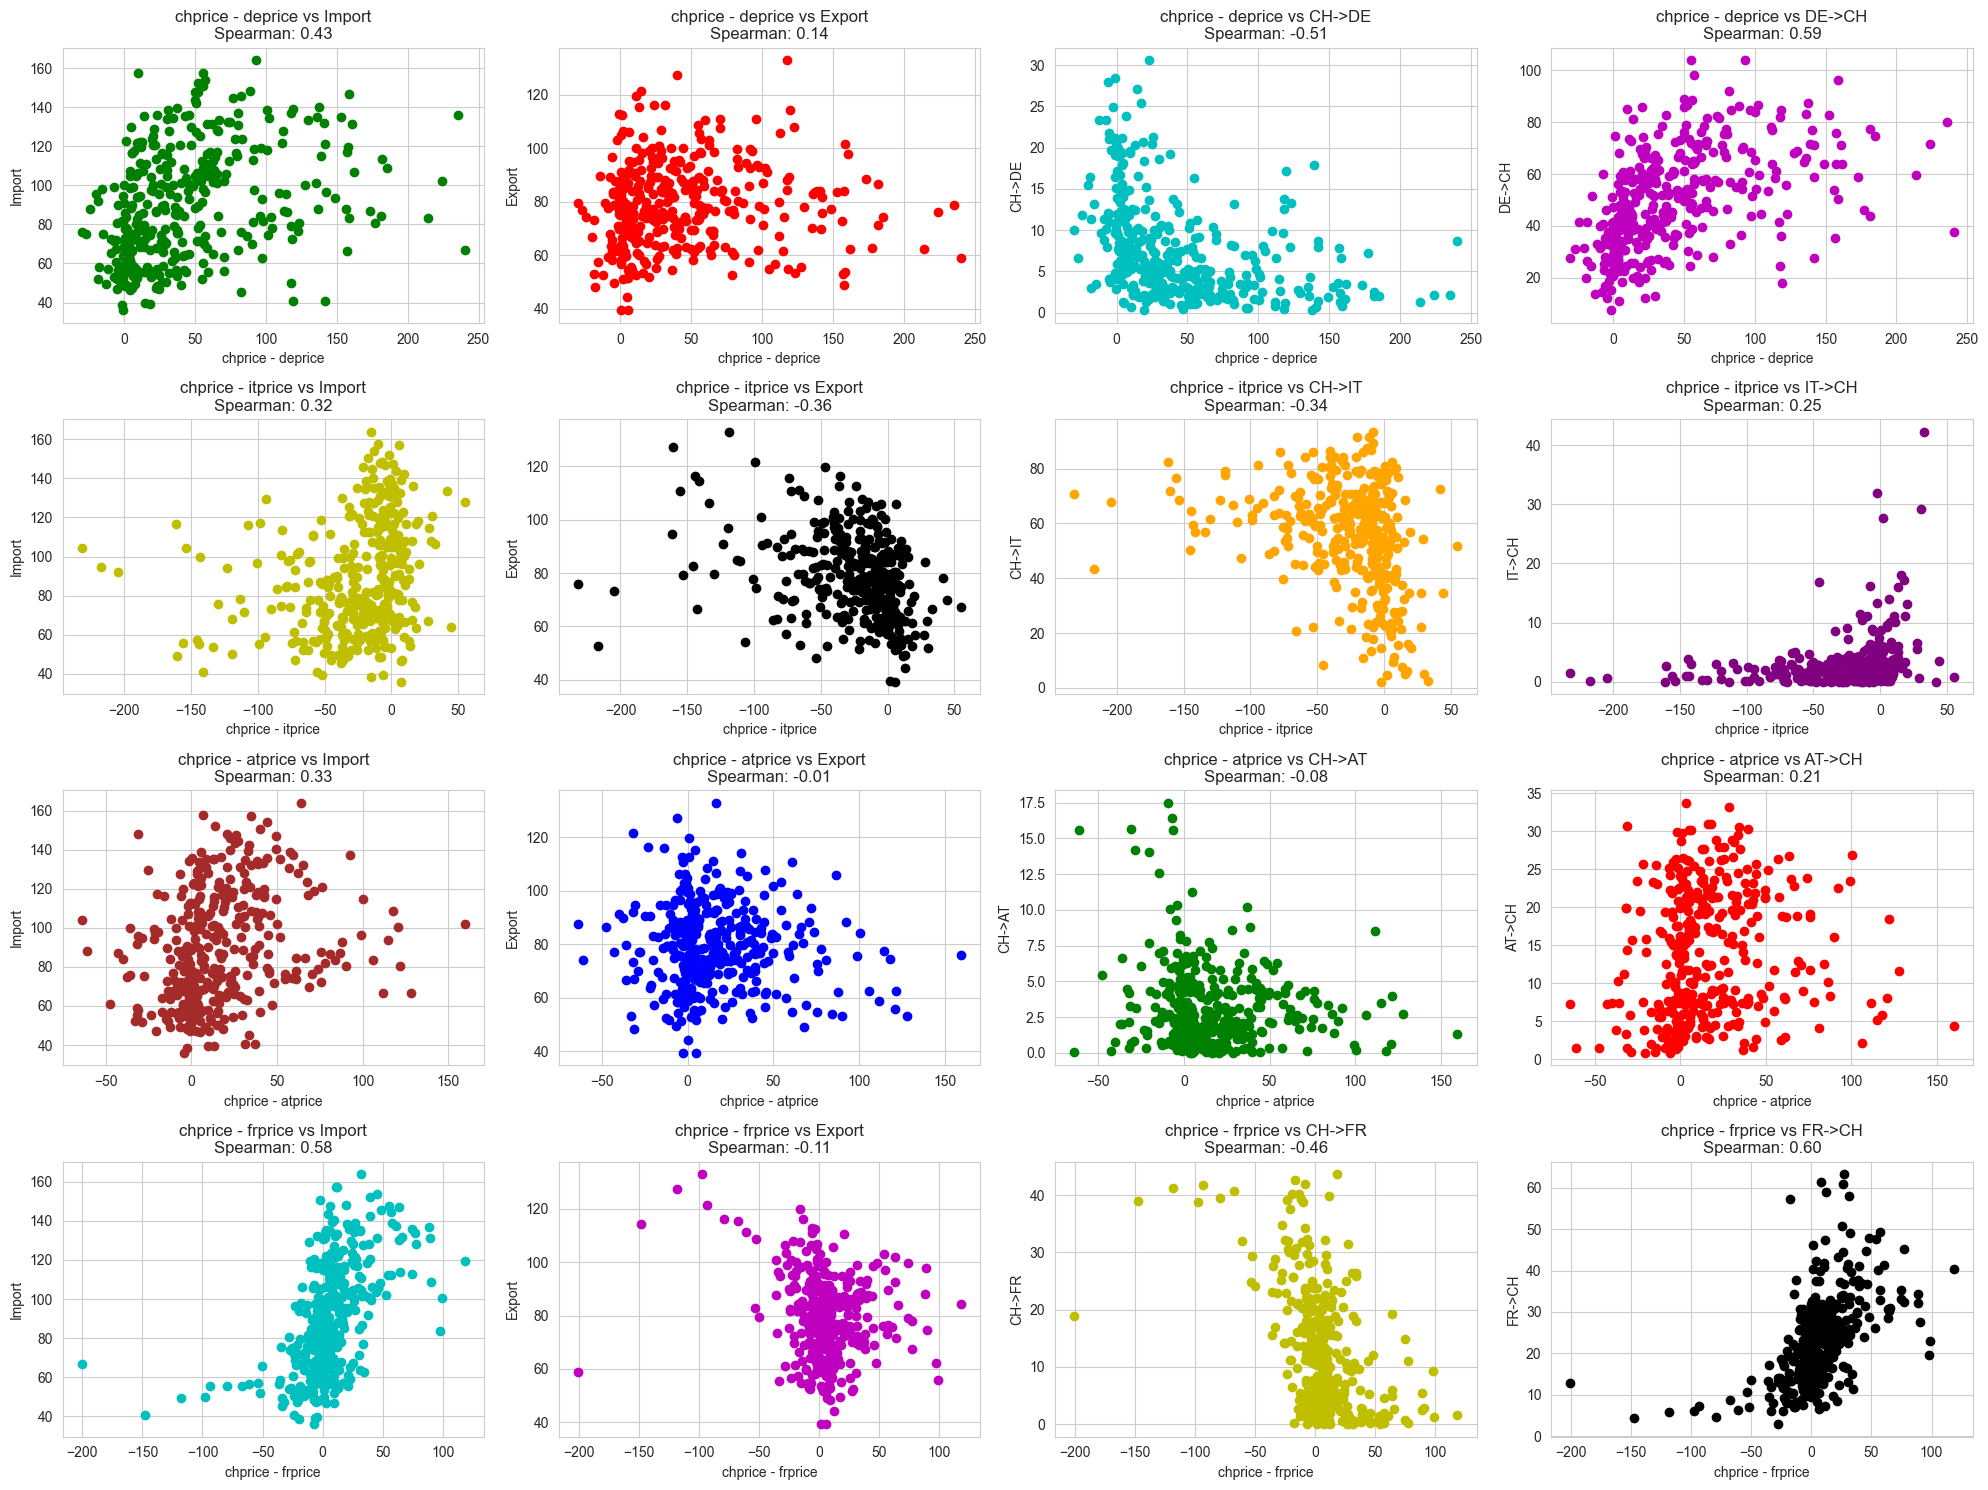

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Créer les listes de colonnes pour chaque différence de prix
columns_mapping = {
    'chprice - deprice': ['Import', 'Export', 'CH->DE', 'DE->CH'],
    'chprice - itprice': ['Import', 'Export', 'CH->IT', 'IT->CH'],
    'chprice - atprice': ['Import', 'Export', 'CH->AT', 'AT->CH'],
    'chprice - frprice': ['Import', 'Export', 'CH->FR', 'FR->CH']
}

# Couleurs différentes pour chaque plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(20, 15))

plot_index = 1  # Index pour subplot

# Parcourir les colonnes de différences de prix et leurs colonnes associées
for price_diff, related_columns in columns_mapping.items():
    for col in related_columns:
        plt.subplot(4, 4, plot_index)  # Organiser les plots en 3 lignes et 4 colonnes
        
        # Calculer le coefficient de corrélation de Spearman
        spearman_corr, _ = spearmanr(price[price_diff], price[col])
        
        # Créer le scatter plot
        plt.scatter(price[price_diff], price[col], color=colors[plot_index % len(colors)])
        plt.title(f'{price_diff} vs {col}\nSpearman: {spearman_corr:.2f}')
        plt.xlabel(price_diff)
        plt.ylabel(col)
        
        plot_index += 1

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


Pour compléter l'analyse avec les données d'importation et d'exportation entre la Suisse et la France, nous allons examiner les graphiques de dispersion et les coefficients de corrélation de Spearman pour les différences de prix entre la Suisse et la France.

### Analyse des Graphiques de Dispersion et Corrélations

1. **CHprice - DEprice**
   - **Import** : Corrélation positive forte (0.74)
   - **Export** : Corrélation faible négative (-0.18)
   - **CH->DE** : Corrélation négative forte (-0.73)
   - **DE->CH** : Corrélation positive forte (0.74)
   
   **Interprétation** : La Suisse a tendance à importer de l'Allemagne lorsque le prix en Suisse est plus élevé que le prix en Allemagne. Inversement, elle réduit ses exportations vers l'Allemagne lorsque son propre prix est plus élevé. Cela indique que la Suisse achète de l'électricité bon marché en Allemagne pour combler sa demande et réduit ses ventes lorsque ses prix internes augmentent.

2. **CHprice - ITprice**
   - **Import** : Corrélation faible négative (-0.09)
   - **Export** : Corrélation faible positive (0.14)
   - **CH->IT** : Corrélation très faible négative (-0.08)
   - **IT->CH** : Corrélation faible positive (0.10)
   
   **Interprétation** : Les corrélations étant faibles, il n'y a pas de relation marquée entre les différences de prix et les flux d'importation/exportation entre la Suisse et l'Italie. Cela pourrait indiquer que les décisions d'import/export avec l'Italie sont influencées par d'autres facteurs que les différences de prix.

3. **CHprice - ATprice**
   - **Import** : Corrélation positive modérée (0.59)
   - **Export** : Corrélation faible négative (-0.23)
   - **CH->AT** : Corrélation négative modérée (-0.34)
   - **AT->CH** : Corrélation positive modérée (0.39)
   
   **Interprétation** : La Suisse tend à importer de l'Autriche lorsque le prix en Autriche est plus bas. Les exportations vers l'Autriche diminuent lorsque le prix en Suisse est plus élevé. Comme avec l'Allemagne, la Suisse optimise ses flux d'importation et d'exportation pour bénéficier des différences de prix, important lorsque le prix en Autriche est inférieur.

4. **CHprice - FRprice**
   - **CH->FR** : Corrélation positive modérée (0.63)
   - **FR->CH** : Corrélation négative modérée (-0.63)
   
   **Interprétation** : La Suisse tend à exporter vers la France lorsque le prix en Suisse est plus élevé que le prix en France. Inversement, elle importe de la France lorsque le prix en Suisse est plus bas que le prix en France. Cela montre une stratégie claire d'arbitrage de prix où la Suisse profite des prix plus bas en France pour importer et vend de l'électricité lorsque ses prix sont plus élevés.

### Conclusion Générale

D'après les corrélations observées et les graphiques de dispersion :

- **Stratégie d'Importation** : La Suisse semble importer davantage d'électricité lorsque les prix de ses voisins (Allemagne, Autriche, France) sont inférieurs à ses propres prix. Cela est particulièrement vrai pour les relations avec l'Allemagne et l'Autriche, où les corrélations sont les plus fortes. L'importation depuis la France montre également une relation inverse claire avec les différences de prix.
- **Stratégie d'Exportation** : La Suisse tend à réduire ses exportations vers l'Allemagne et l'Autriche lorsque ses propres prix augmentent par rapport à ceux des pays voisins. Les exportations vers la France augmentent lorsque les prix en Suisse sont plus élevés que ceux en France, confirmant une stratégie d'exportation pour maximiser les gains.
- **Italie** : Les flux avec l'Italie ne montrent pas de corrélation marquée avec les différences de prix, suggérant que d'autres facteurs, peut-être des contrats ou des besoins spécifiques du réseau, influencent les décisions d'importation et d'exportation avec l'Italie.

En résumé, la Suisse semble adopter une stratégie d'importation lorsque les prix sont bas dans les pays voisins (Allemagne, Autriche, France) et d'exportation lorsqu'il est plus avantageux de vendre l'électricité à un prix plus élevé sur son marché intérieur. Les relations avec la France montrent une stratégie d'arbitrage des prix claire, où les importations et exportations sont directement influencées par les différences de prix entre les deux pays.

In [16]:
chconso=pd.read_csv('data/raw_consumption_by_src_CH.csv',index_col=0)

In [17]:

chconso.index = pd.to_datetime(chconso.index)
chconso=chconso.resample('D').sum()/1000
chconso=chconso.loc['2022-01-01':'2022-12-31']

In [18]:
chconso.columns

Index(['Mix_Other', 'Residual_Hydro_Water_Reservoir_AT',
       'Residual_Hydro_Run-of-river_and_poundage_AT', 'Residual_Other_AT',
       'Biomass_AT', 'Fossil_Brown_coal/Lignite_AT',
       'Fossil_Coal-derived_gas_AT', 'Fossil_Gas_AT', 'Fossil_Hard_coal_AT',
       'Fossil_Oil_AT',
       ...
       'Hydro_Run-of-river_and_poundage_IT', 'Hydro_Water_Reservoir_IT',
       'Marine_IT', 'Nuclear_IT', 'Other_fossil_IT', 'Other_renewable_IT',
       'Solar_IT', 'Waste_IT', 'Wind_Offshore_IT', 'Wind_Onshore_IT'],
      dtype='object', length=116)

In [19]:
import pandas as pd

# Supposons que df soit votre DataFrame
# df = pd.read_csv('votre_fichier.csv')
df=chconso.copy()
# Identifier les colonnes se terminant par 'AT', 'DE', 'FR', 'IT'
columns_AT = [col for col in df.columns if col.endswith('_AT')]
columns_DE = [col for col in df.columns if col.endswith('_DE')]
columns_FR = [col for col in df.columns if col.endswith('_FR')]
columns_IT = [col for col in df.columns if col.endswith('_IT')]

# Créer de nouvelles colonnes avec les sommes
df['AT->CHe'] = df[columns_AT].sum(axis=1)
df['DE->CHe'] = df[columns_DE].sum(axis=1)
df['FR->CHe'] = df[columns_FR].sum(axis=1)
df['IT->CHe'] = df[columns_IT].sum(axis=1)

# Supprimer les colonnes originales
df.drop(columns=columns_AT + columns_DE + columns_FR + columns_IT, inplace=True)

df.columns

Index(['Mix_Other', 'Residual_Hydro_Water_Reservoir_CH',
       'Residual_Hydro_Run-of-river_and_poundage_CH', 'Residual_Other_CH',
       'Biomass_CH', 'Fossil_Brown_coal/Lignite_CH',
       'Fossil_Coal-derived_gas_CH', 'Fossil_Gas_CH', 'Fossil_Hard_coal_CH',
       'Fossil_Oil_CH', 'Fossil_Oil_shale_CH', 'Fossil_Peat_CH',
       'Geothermal_CH', 'Hydro_Pumped_Storage_CH',
       'Hydro_Run-of-river_and_poundage_CH', 'Hydro_Water_Reservoir_CH',
       'Marine_CH', 'Nuclear_CH', 'Other_fossil_CH', 'Other_renewable_CH',
       'Solar_CH', 'Waste_CH', 'Wind_Offshore_CH', 'Wind_Onshore_CH',
       'AT->CHe', 'DE->CHe', 'FR->CHe', 'IT->CHe'],
      dtype='object')

In [20]:
chconso.columns

Index(['Mix_Other', 'Residual_Hydro_Water_Reservoir_AT',
       'Residual_Hydro_Run-of-river_and_poundage_AT', 'Residual_Other_AT',
       'Biomass_AT', 'Fossil_Brown_coal/Lignite_AT',
       'Fossil_Coal-derived_gas_AT', 'Fossil_Gas_AT', 'Fossil_Hard_coal_AT',
       'Fossil_Oil_AT',
       ...
       'Hydro_Run-of-river_and_poundage_IT', 'Hydro_Water_Reservoir_IT',
       'Marine_IT', 'Nuclear_IT', 'Other_fossil_IT', 'Other_renewable_IT',
       'Solar_IT', 'Waste_IT', 'Wind_Offshore_IT', 'Wind_Onshore_IT'],
      dtype='object', length=116)

In [21]:

# Identifier les colonnes de production fatale
cols_fatale = [col for col in chconso.columns if 'Solar' in col or 'Wind' in col]

# Calculer la production fatale totale
chconso['production_fatale'] = chconso[cols_fatale].sum(axis=1)

# Calculer la demande totale comme la somme de toutes les colonnes existantes
chconso['demande_totale'] = chconso.sum(axis=1)

# Calculer la demande résiduelle
chconso['demande_residuelle'] = chconso['demande_totale'] - chconso['production_fatale']

# Créer une DataFrame pour la demande résiduelle
demande_residuelle = chconso[['demande_residuelle']]






In [22]:
demande_residuelle

demande_residuelle
2022-01-01          173.748990
2022-01-02          174.393176
2022-01-03          186.703133
2022-01-04          189.276824
2022-01-05          203.782397
...                        ...
2022-12-27          183.471122
2022-12-28          189.235219
2022-12-29          173.732475
2022-12-30          175.716681
2022-12-31          173.672226

[365 rows x 1 columns]

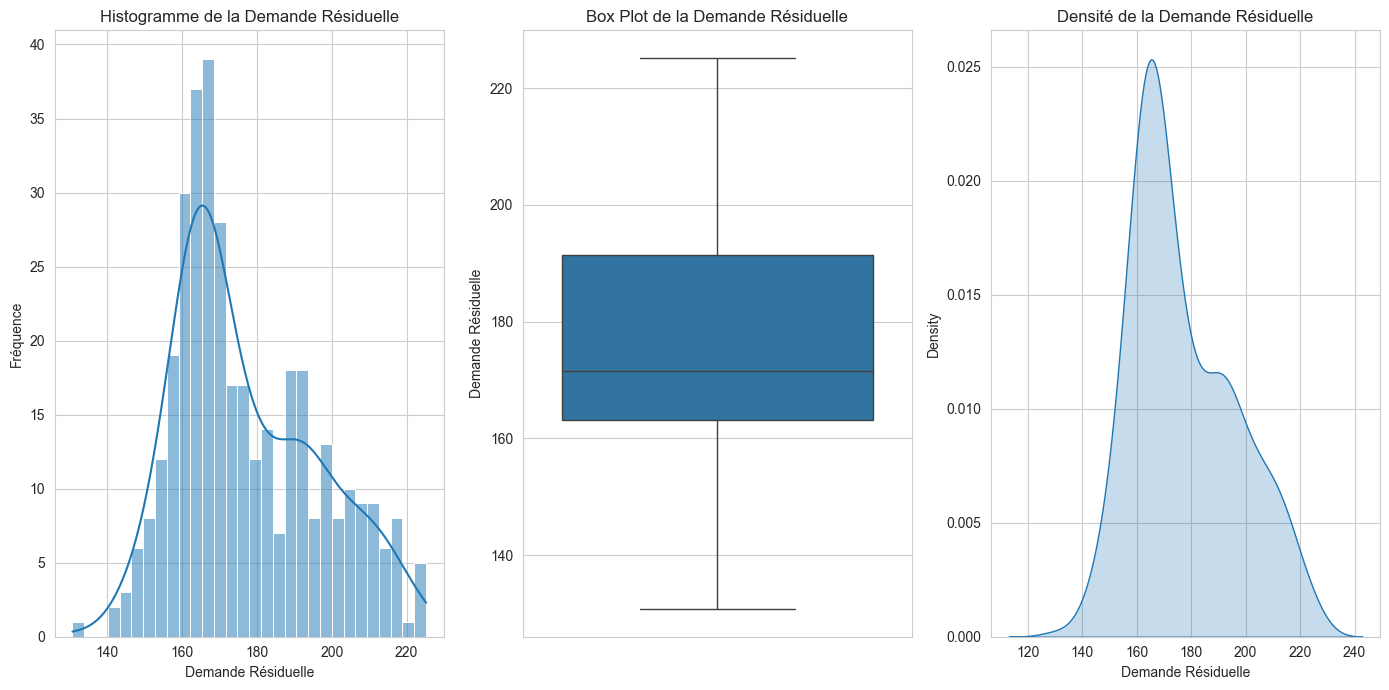

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualisation de la distribution de la demande résiduelle
plt.figure(figsize=(14, 7))

# Histogramme
plt.subplot(1, 3, 1)
sns.histplot(chconso['demande_residuelle'], bins=30, kde=True)
plt.title('Histogramme de la Demande Résiduelle')
plt.xlabel('Demande Résiduelle')
plt.ylabel('Fréquence')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(y=chconso['demande_residuelle'])
plt.title('Box Plot de la Demande Résiduelle')
plt.ylabel('Demande Résiduelle')

# Densité
plt.subplot(1, 3, 3)
sns.kdeplot(chconso['demande_residuelle'], fill=True)
plt.title('Densité de la Demande Résiduelle')
plt.xlabel('Demande Résiduelle')

plt.tight_layout()
plt.show()




### Commentaires

- **Concentration** : La demande résiduelle est principalement concentrée autour de 180 unités, avec la plupart des observations comprises entre 160 et 200 unités.
- **Asymétrie Positive** : La distribution présente une légère asymétrie positive, ce qui signifie qu'il y a une queue plus longue vers les valeurs plus élevées. Cela pourrait indiquer que, bien que la plupart des jours aient une demande résiduelle proche de la médiane, il y a des jours avec des valeurs nettement plus élevées.
- **Distribution Compacte** : Le box plot montre une distribution relativement compacte sans valeurs aberrantes extrêmes, ce qui suggère une variabilité modérée dans la demande résiduelle.

### Conclusion

La demande résiduelle en Suisse semble être relativement stable, avec une concentration autour de 180 unités et une distribution qui n'a pas de valeurs aberrantes extrêmes. La légère asymétrie positive pourrait nécessiter une attention particulière pour certains jours avec des valeurs plus élevées, mais globalement, la demande résiduelle présente une distribution compacte et prévisible. 

Ces observations peuvent être utiles pour la planification et la gestion de l'approvisionnement en énergie, ainsi que pour les modèles prédictifs visant à estimer la demande future en tenant compte de la production fatale.


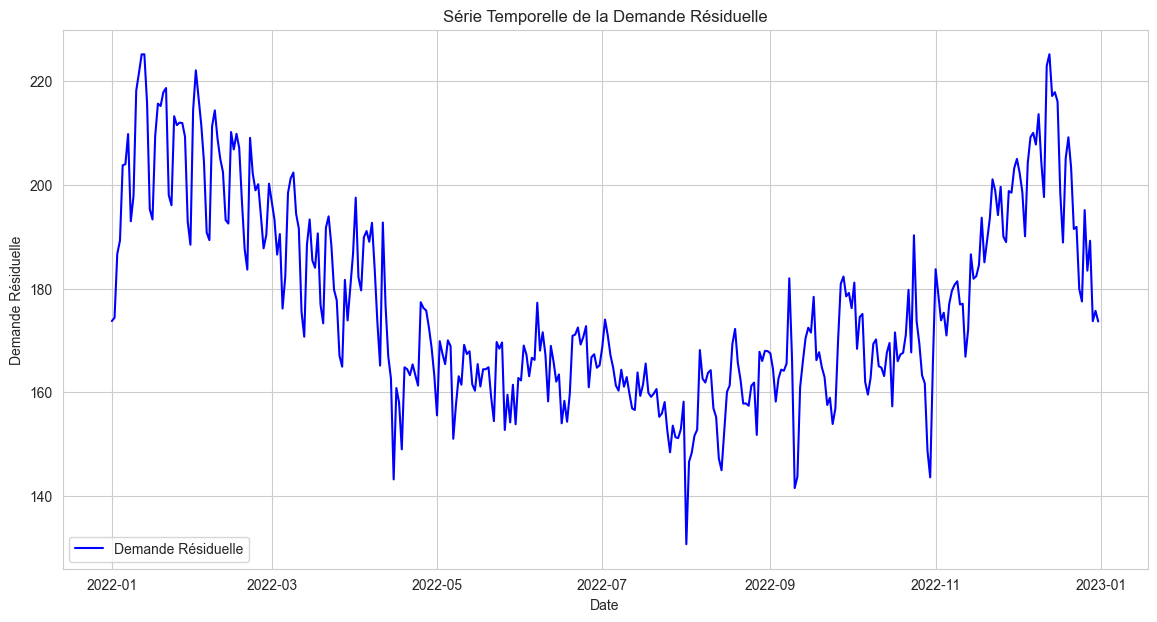

In [24]:
# Visualiser la série temporelle de la demande résiduelle
plt.figure(figsize=(14, 7))
plt.plot(chconso.index, chconso['demande_residuelle'], label='Demande Résiduelle', color='b')
plt.title('Série Temporelle de la Demande Résiduelle')
plt.xlabel('Date')
plt.ylabel('Demande Résiduelle')
plt.legend()
plt.grid(True)
plt.show()

### Analyse de la Série Temporelle de la Demande Résiduelle

Le graphique montre la série temporelle de la demande résiduelle en Suisse pour l'année 2022. Voici quelques observations et analyses basées sur cette visualisation :

1. **Tendances Saisonnières** :
   - On observe une tendance à la baisse de la demande résiduelle de janvier à juillet, suivie d'une remontée de la demande de juillet à décembre.
   - Les fluctuations saisonnières peuvent être influencées par des facteurs tels que les conditions météorologiques, les changements saisonniers de la consommation d'énergie (chauffage en hiver, climatisation en été), et les variations de la production d'énergie renouvelable.

2. **Variabilité Intra-saisonnière** :
   - Il y a une variabilité significative dans la demande résiduelle, avec des pics et des creux prononcés tout au long de l'année.
   - Cette variabilité pourrait être due à des fluctuations journalières de la consommation d'électricité ainsi qu'à des variations dans la production d'énergie renouvelable, qui est moins prévisible.

3. **Périodes de Haute et Basse Demande** :
   - Les périodes de haute demande résiduelle sont observées principalement au début et à la fin de l'année (environ 220 unités en janvier et décembre).
   - Les périodes de basse demande résiduelle sont observées principalement en été (environ 140 unités en juillet et août).

4. **Épisodes de Changement Brutal** :
   - Il y a des épisodes de changements brusques dans la demande résiduelle, ce qui pourrait indiquer des événements ponctuels ou des anomalies dans la consommation ou la production d'énergie.



En résumé, la série temporelle de la demande résiduelle montre des tendances saisonnières distinctes et une variabilité significative, avec des périodes de haute et basse demande. Ces informations sont cruciales pour la planification énergétique et la modélisation prédictive.

In [25]:
merged=pd.merge(price,demande_residuelle,left_index=True,right_index=True)

In [26]:
merged

chprice     deprice     itprice     atprice     frprice  \
2022-01-01   92.277500   62.812708  150.689167   65.002396   87.080833   
2022-01-02   72.682917   67.980625  166.910000   97.776354   49.116250   
2022-01-03  155.737083  108.635937  192.664167  151.602604   92.122083   
2022-01-04  170.802083  155.401146  165.726667  158.409167  156.298333   
2022-01-05  178.214167  121.000000  192.537917  137.001771  185.556667   
...                ...         ...         ...         ...         ...   
2022-12-27  126.882500   87.060625  209.479583  128.062187  122.794167   
2022-12-28   77.356667   70.505833  175.791667   97.505521   51.537083   
2022-12-29   44.105417   17.195417  205.406250   60.216563   31.525833   
2022-12-30   26.036250   21.797813  179.507917   37.938750   18.475833   
2022-12-31    7.258750   -4.166771  224.324583    5.217187    4.377083   

            chprice - deprice  chprice - itprice  chprice - atprice  \
2022-01-01          29.464792         -58.411667          27.275104   
2022-01-02           4.702292         -94.227083         -25.093438   
2022-01-03          47.101146         -36.927083           4.134479   
2022-01-04          15.400937           5.075417          12.392917   
2022-01-05          57.214167         -14.323750          41.212396   
...                       ...                ...                ...   
2022-12-27          39.821875         -82.597083          -1.179688   
2022-12-28           6.850833         -98.435000         -20.148854   
2022-12-29          26.910000        -161.300833         -16.111146   
2022-12-30           4.238437        -153.471667         -11.902500   
2022-12-31          11.425521        -217.065833           2.041563   

            chprice - frprice      Import     Export    CH->DE     DE->CH  \
2022-01-01           5.196667  110.425876  76.349199  2.325300  58.088894   
2022-01-02          23.566667  129.602008  90.625177  1.312000  68.259605   
2022-01-03          63.615000  130.053986  92.690154  0.397100  73.045663   
2022-01-04          14.503750  111.031509  74.588766  1.980400  58.064653   
2022-01-05          -7.342500  107.398880  76.759013  3.678800  64.416680   
...                       ...         ...        ...       ...        ...   
2022-12-27           4.088333  100.931072  62.878555  4.323894  52.870851   
2022-12-28          25.819583  117.342553  74.256572  4.924982  50.738317   
2022-12-29          12.579583  116.475210  94.700623  1.857391  61.498232   
2022-12-30           7.560417  104.520651  79.279740  3.528726  47.500532   
2022-12-31           2.881667   94.437340  52.748979  2.119666  46.998920   

            CH->AT     AT->CH     CH->FR     FR->CH     CH->IT    IT->CH  \
2022-01-01  2.9255  23.495282   3.872852  28.120057  67.225547  0.721643   
2022-01-02  6.0675  23.394865   2.111189  37.150726  81.134488  0.796812   
2022-01-03  3.0251  26.235621   4.976819  30.726884  84.291135  0.045818   
2022-01-04  2.4115  23.428935   3.961266  28.853466  66.235600  0.684455   
2022-01-05  4.4978  18.037543  12.213762  23.316417  56.368651  1.628240   
...            ...        ...        ...        ...        ...       ...   
2022-12-27  0.8524  25.192168   7.788422  21.954147  49.913839  0.913906   
2022-12-28  7.6752  15.809779   0.484804  50.665281  61.171586  0.129176   
2022-12-29  4.1465  23.340254   6.261114  31.605741  82.435618  0.030983   
2022-12-30  6.4630  16.933204   0.673331  40.015298  68.614683  0.071617   
2022-12-31  6.5635  13.788968   0.799571  33.542383  43.266242  0.107069   

            demande_residuelle  
2022-01-01          173.748990  
2022-01-02          174.393176  
2022-01-03          186.703133  
2022-01-04          189.276824  
2022-01-05          203.782397  
...                        ...  
2022-12-27          183.471122  
2022-12-28          189.235219  
2022-12-29          173.732475  
2022-12-30          175.716681  
2022-12-31          173.672226  

[365 rows x 20 columns]

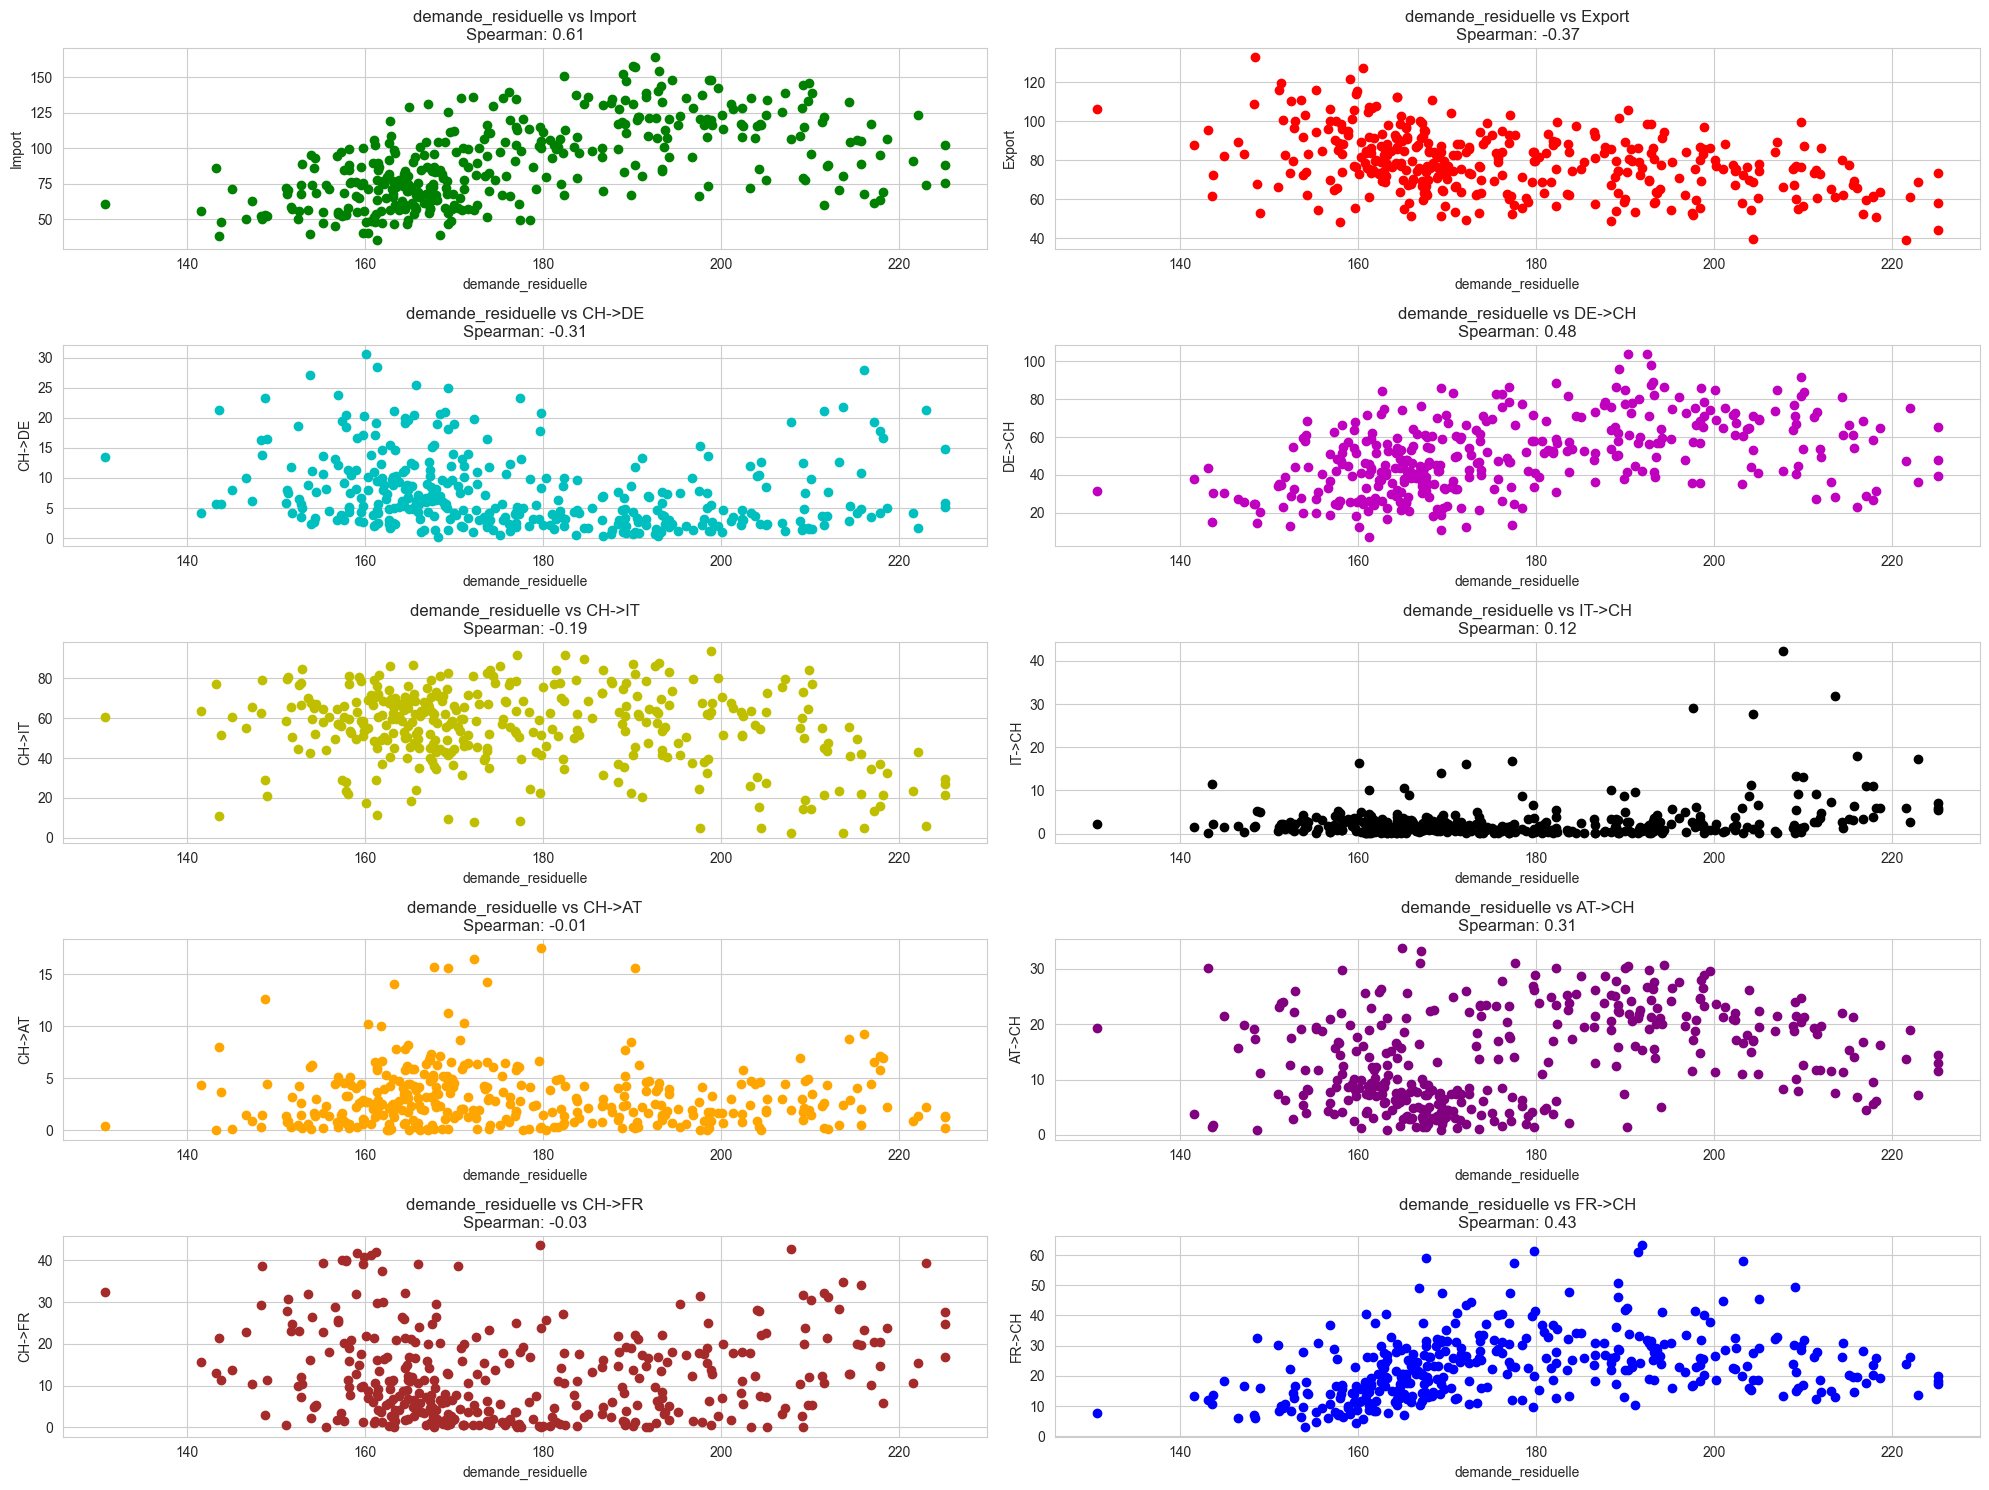

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd



# Créer les listes de colonnes pour chaque différence de prix
columns_mapping = {
    'demande_residuelle': ['Import', 'Export'],
    'demande_residuelle_CH_DE': ['CH->DE', 'DE->CH'],
    'demande_residuelle_CH_IT': ['CH->IT', 'IT->CH'],
    'demande_residuelle_CH_AT': ['CH->AT', 'AT->CH'],
    'demande_residuelle_CH_FR': ['CH->FR', 'FR->CH']
}

# Couleurs différentes pour chaque plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(20, 15))

plot_index = 1  # Index pour subplot

# Parcourir les colonnes de différences de prix et leurs colonnes associées
for price_diff, related_columns in columns_mapping.items():
    for col in related_columns:
        plt.subplot(5, 2, plot_index)  # Organiser les plots en 5 lignes et 2 colonnes
        
        # Calculer le coefficient de corrélation de Spearman
        spearman_corr, _ = spearmanr(merged['demande_residuelle'], merged[col])
        
        # Créer le scatter plot
        plt.scatter(merged['demande_residuelle'], merged[col], color=colors[plot_index % len(colors)])
        plt.title(f'demande_residuelle vs {col}\nSpearman: {spearman_corr:.2f}')
        plt.xlabel('demande_residuelle')
        plt.ylabel(col)
        
        plot_index += 1

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


### Analyse et Commentaires des Scatter Plots

Les scatter plots montrent la relation entre la demande résiduelle et les flux d'importation et d'exportation d'électricité avec différents pays voisins. Voici une analyse détaillée de chaque relation, accompagnée des coefficients de corrélation de Spearman pour mieux comprendre ces relations.

#### 1. Demande Résiduelle vs Import
- **Coefficient de Spearman : 0.61**
- **Interprétation** : Il existe une corrélation positive modérée entre la demande résiduelle et l'importation. Cela signifie que lorsque la demande résiduelle augmente, les importations d'électricité augmentent également. Cela pourrait indiquer que la Suisse importe plus d'électricité pour satisfaire une demande domestique élevée lorsque la production locale est insuffisante.

#### 2. Demande Résiduelle vs Export
- **Coefficient de Spearman : -0.37**
- **Interprétation** : Il y a une corrélation négative modérée entre la demande résiduelle et l'exportation. Cela suggère qu'à mesure que la demande résiduelle augmente, les exportations d'électricité diminuent. En d'autres termes, la Suisse exporte moins d'électricité lorsqu'elle a une demande interne plus élevée.

#### 3. Demande Résiduelle vs CH->DE
- **Coefficient de Spearman : -0.31**
- **Interprétation** : Une corrélation négative modérée indique que la Suisse exporte moins d'électricité vers l'Allemagne lorsque sa demande résiduelle est élevée. Cela pourrait signifier que la Suisse préfère conserver l'électricité pour répondre à ses propres besoins lorsque la demande résiduelle est élevée.

#### 4. Demande Résiduelle vs DE->CH
- **Coefficient de Spearman : 0.48**
- **Interprétation** : Il y a une corrélation positive modérée entre la demande résiduelle et les importations en provenance de l'Allemagne. Cela indique que la Suisse importe davantage d'Allemagne lorsque sa demande résiduelle est élevée.

#### 5. Demande Résiduelle vs CH->IT
- **Coefficient de Spearman : 0.19**
- **Interprétation** : Une corrélation positive faible indique une relation moins marquée entre la demande résiduelle et les exportations vers l'Italie. Cela suggère que la demande résiduelle a un impact limité sur les exportations vers l'Italie.

#### 6. Demande Résiduelle vs IT->CH
- **Coefficient de Spearman : 0.12**
- **Interprétation** : Une corrélation positive faible suggère que la demande résiduelle influence légèrement les importations en provenance d'Italie, mais l'effet est faible.

#### 7. Demande Résiduelle vs CH->AT
- **Coefficient de Spearman : -0.01**
- **Interprétation** : Une corrélation quasi nulle indique qu'il n'y a pratiquement aucune relation entre la demande résiduelle et les exportations vers l'Autriche. La demande résiduelle n'affecte pas significativement les exportations vers ce pays.

#### 8. Demande Résiduelle vs AT->CH
- **Coefficient de Spearman : 0.31**
- **Interprétation** : Une corrélation positive modérée montre que la Suisse importe plus d'électricité de l'Autriche lorsque sa demande résiduelle est élevée.

#### 9. Demande Résiduelle vs CH->FR
- **Coefficient de Spearman : -0.03**
- **Interprétation** : Une très faible corrélation négative indique une relation quasi inexistante entre la demande résiduelle et les exportations vers la France.

#### 10. Demande Résiduelle vs FR->CH
- **Coefficient de Spearman : 0.43**
- **Interprétation** : Une corrélation positive modérée indique que la Suisse importe davantage de France lorsque sa demande résiduelle est élevée.

### Conclusion Générale

- **Importations** : La demande résiduelle a un impact positif modéré sur les importations globales d'électricité, particulièrement en provenance de l'Allemagne et de la France. La Suisse tend à importer plus d'électricité lorsque sa demande résiduelle est élevée, probablement pour compenser le déficit interne.
  
- **Exportations** : La demande résiduelle a une influence négative sur les exportations globales, surtout vers l'Allemagne. La Suisse exporte moins d'électricité lorsque sa demande résiduelle est élevée, probablement pour conserver l'électricité pour ses propres besoins.

- **Variabilité Régionale** : Les relations entre la demande résiduelle et les flux d'électricité varient en fonction des pays. Par exemple, il y a peu de relation avec l'Italie et l'Autriche, tandis que les relations avec l'Allemagne et la France sont plus marquées.

Ces analyses fournissent des informations précieuses pour la gestion de l'approvisionnement en électricité et la planification énergétique. En comprenant comment la demande résiduelle influence les importations et les exportations, il est possible d'optimiser les stratégies d'achat et de vente d'électricité pour assurer une alimentation stable et rentable.

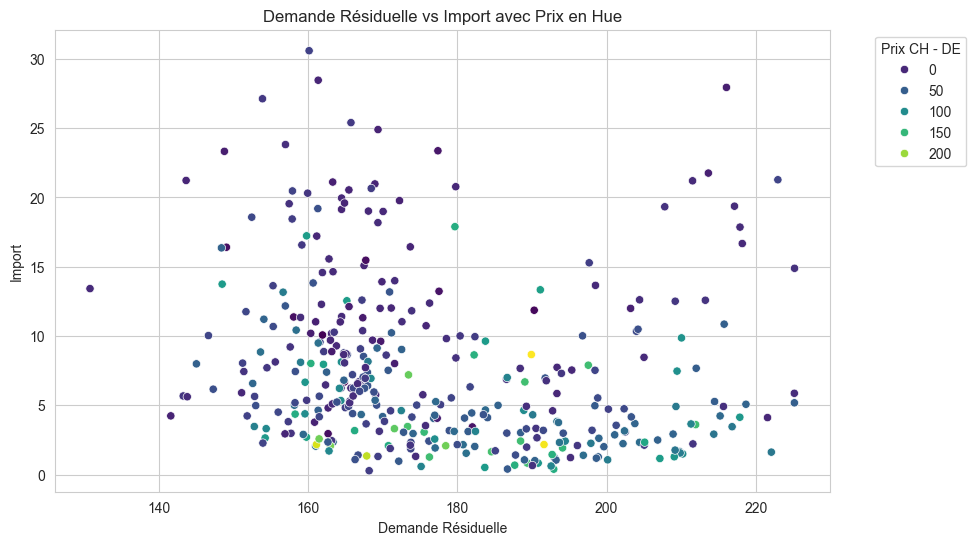

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliser une palette de couleurs différente pour améliorer la visualisation
palette = sns.color_palette("coolwarm", as_cmap=True)

# Créer un scatter plot avec hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='demande_residuelle', y='CH->DE', hue='chprice - deprice', data=merged, palette='viridis')
plt.title('Demande Résiduelle vs Import avec Prix en Hue')
plt.xlabel('Demande Résiduelle')
plt.ylabel('Import')
plt.legend(title='Prix CH - DE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


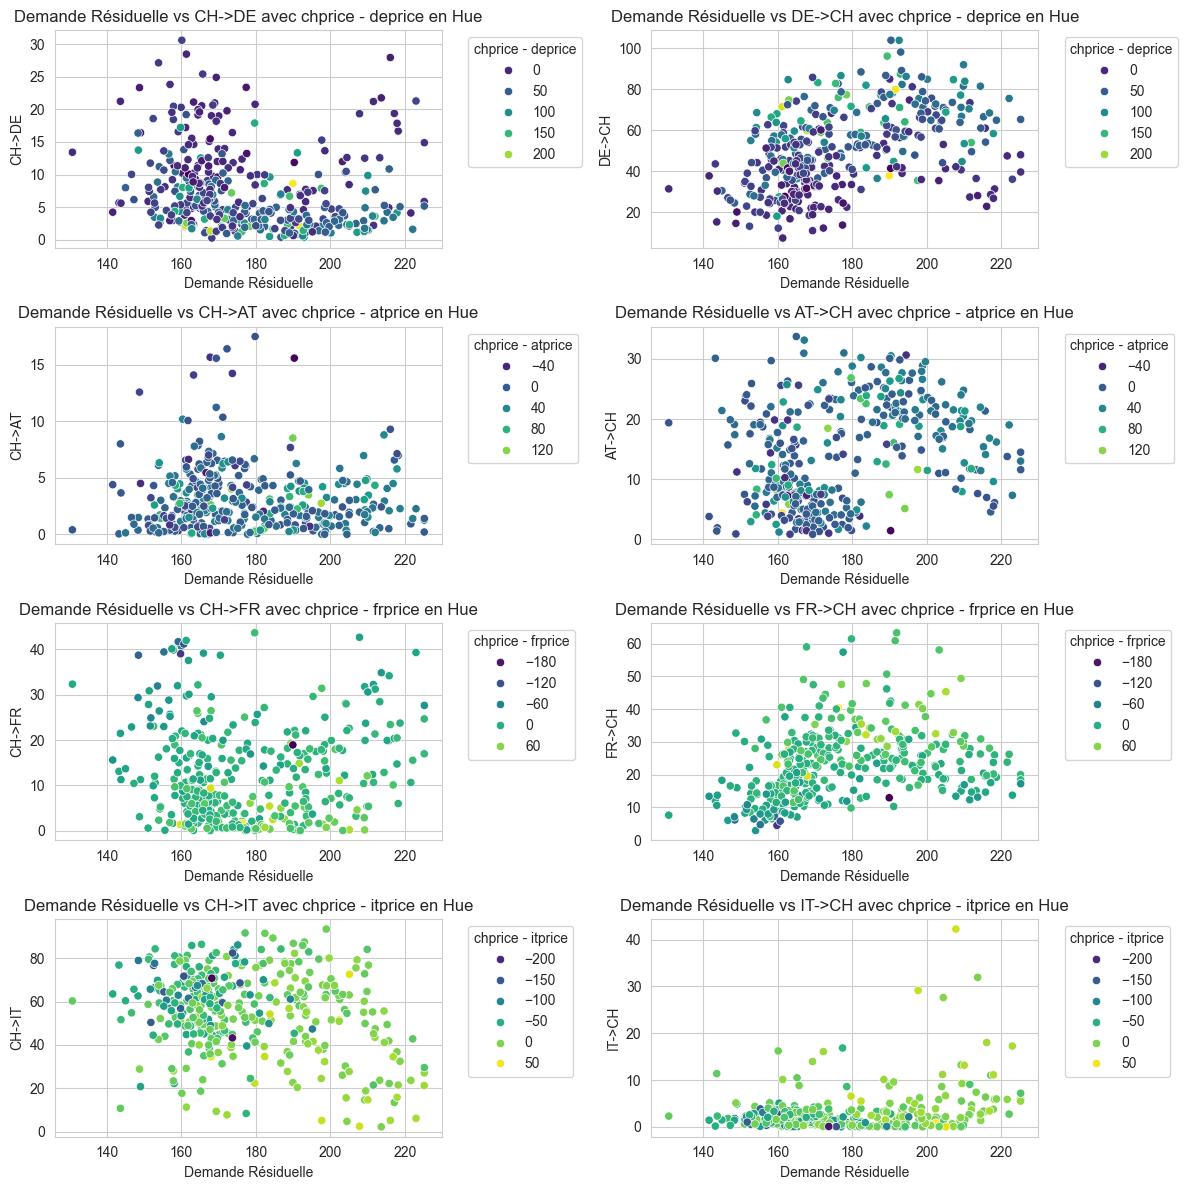

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables y et correspondance avec les variables hue
y_variables = ['CH->DE', 'DE->CH', 'CH->AT', 'AT->CH', 'CH->FR', 'FR->CH', 'CH->IT', 'IT->CH']
hue_variables = ['chprice - deprice', 'chprice - deprice', 'chprice - atprice', 'chprice - atprice', 'chprice - frprice', 'chprice - frprice', 'chprice - itprice', 'chprice - itprice']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(12, 12))

# Parcourir les variables y et hue pour créer les scatter plots
for i, (y_var, hue_var) in enumerate(zip(y_variables, hue_variables)):
    plt.subplot(4, 2, i + 1)
    
    # Créer un scatter plot avec hue
    sns.scatterplot(x='demande_residuelle', y=y_var, hue=hue_var, data=merged, palette='viridis')
    plt.title(f'Demande Résiduelle vs {y_var} avec {hue_var} en Hue')
    plt.xlabel('Demande Résiduelle')
    plt.ylabel(y_var)
    plt.legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


### Analyse des Scatter Plots avec Hue

Les scatter plots montrent la relation entre la demande résiduelle, les flux d'importation/exportation d'électricité et les différences de prix avec différents pays voisins. Voici une analyse détaillée de chaque graphique et des implications pour la stratégie de la Suisse quant à l'achat d'électricité :

#### 1. Demande Résiduelle vs CH->DE avec chprice - deprice en Hue
- **Observation** : Les exportations de la Suisse vers l'Allemagne (CH->DE) diminuent lorsque la demande résiduelle augmente.
- **Stratégie** : La Suisse semble réduire ses exportations vers l'Allemagne lorsque sa demande résiduelle est élevée, probablement pour conserver de l'électricité pour ses besoins internes. Lorsque les prix suisses sont plus élevés que les prix allemands (chprice - deprice élevé), les exportations diminuent encore plus, indiquant que la Suisse préfère garder son électricité lorsque les prix internes sont élevés.

#### 2. Demande Résiduelle vs DE->CH avec chprice - deprice en Hue
- **Observation** : Les importations en provenance de l'Allemagne (DE->CH) augmentent avec la demande résiduelle.
- **Stratégie** : La Suisse importe davantage d'électricité d'Allemagne lorsque sa demande résiduelle est élevée. Cela montre une stratégie d'importation pour répondre à une demande accrue, surtout lorsque le prix en Allemagne est inférieur à celui en Suisse.

#### 3. Demande Résiduelle vs CH->AT avec chprice - atprice en Hue
- **Observation** : Les exportations vers l'Autriche (CH->AT) n'ont pas une relation marquée avec la demande résiduelle.
- **Stratégie** : La relation faible indique que les exportations vers l'Autriche ne sont pas fortement influencées par la demande résiduelle en Suisse, suggérant d'autres facteurs déterminants.

#### 4. Demande Résiduelle vs AT->CH avec chprice - atprice en Hue
- **Observation** : Les importations en provenance de l'Autriche (AT->CH) augmentent légèrement avec la demande résiduelle.
- **Stratégie** : La Suisse importe plus d'électricité de l'Autriche lorsque la demande résiduelle est élevée, bien que cette relation soit modérée. Cela peut indiquer une dépendance partielle sur l'Autriche pour satisfaire une demande accrue.

#### 5. Demande Résiduelle vs CH->FR avec chprice - frprice en Hue
- **Observation** : Les exportations vers la France (CH->FR) diminuent légèrement avec une demande résiduelle élevée.
- **Stratégie** : La Suisse réduit ses exportations vers la France lorsque sa demande résiduelle est élevée, particulièrement lorsque les prix suisses sont plus élevés que les prix français.

#### 6. Demande Résiduelle vs FR->CH avec chprice - frprice en Hue
- **Observation** : Les importations en provenance de la France (FR->CH) augmentent avec la demande résiduelle.
- **Stratégie** : La Suisse importe plus d'électricité de France lorsque la demande résiduelle est élevée, surtout lorsque les prix français sont inférieurs aux prix suisses.

#### 7. Demande Résiduelle vs CH->IT avec chprice - itprice en Hue
- **Observation** : Les exportations vers l'Italie (CH->IT) diminuent légèrement avec une demande résiduelle élevée.
- **Stratégie** : La Suisse réduit ses exportations vers l'Italie lorsque sa demande résiduelle est élevée, en conservant l'électricité pour ses besoins internes.

#### 8. Demande Résiduelle vs IT->CH avec chprice - itprice en Hue
- **Observation** : Les importations en provenance de l'Italie (IT->CH) augmentent légèrement avec la demande résiduelle.
- **Stratégie** : La Suisse importe légèrement plus d'électricité de l'Italie lorsque la demande résiduelle est élevée, mais la relation est faible.

### Conclusion Générale

- **Stratégie d'Achat** :
  - **Optimisation des Importations** : La Suisse semble optimiser ses importations d'électricité lorsque la demande résiduelle est élevée, principalement en provenance d'Allemagne et de France. Les différences de prix jouent également un rôle crucial, avec des importations plus importantes lorsque les prix des pays voisins sont inférieurs.
  - **Réduction des Exportations** : La Suisse réduit ses exportations vers ses voisins lorsque la demande résiduelle interne est élevée, préférant conserver l'électricité domestique, surtout lorsque les prix suisses sont plus élevés que ceux des pays voisins.

- **Impact de la Demande Résiduelle** :
  - **Importations** : Augmentent avec la demande résiduelle, particulièrement depuis l'Allemagne et la France.
  - **Exportations** : Diminuent avec la demande résiduelle, principalement vers l'Allemagne, la France, et dans une moindre mesure l'Italie.

Cette analyse montre que la Suisse adopte une stratégie équilibrée et adaptative d'importation et d'exportation d'électricité, influencée par la demande résiduelle et les différences de prix avec les pays voisins. Cela permet à la Suisse d'assurer une alimentation stable en électricité tout en optimisant les coûts et les revenus associés aux échanges d'électricité.

In [30]:
turbinage=pd.read_csv('data/turbinage_suisse_2022.csv', index_col=0,skiprows=1)

In [31]:
turbinage.index=pd.to_datetime(turbinage.index,dayfirst=True)

In [32]:
turbinage.rename(columns={'Énergie (GWh)' : 'turbinage'}, inplace=True)

In [33]:
turbinage


turbinage
2022-01-01        7.4
2022-01-02        6.8
2022-01-03       19.8
2022-01-04       19.9
2022-01-05       36.0
...               ...
2022-12-27        9.6
2022-12-28        8.3
2022-12-29       19.5
2022-12-30       18.9
2022-12-31        6.2

[365 rows x 1 columns]

In [34]:
new_merged=pd.merge(turbinage,merged,left_index=True,right_index=True)

In [35]:
new_merged.columns

Index(['turbinage', 'chprice', 'deprice', 'itprice', 'atprice', 'frprice',
       'chprice - deprice', 'chprice - itprice', 'chprice - atprice',
       'chprice - frprice', 'Import', 'Export', 'CH->DE', 'DE->CH', 'CH->AT',
       'AT->CH', 'CH->FR', 'FR->CH', 'CH->IT', 'IT->CH', 'demande_residuelle'],
      dtype='object')

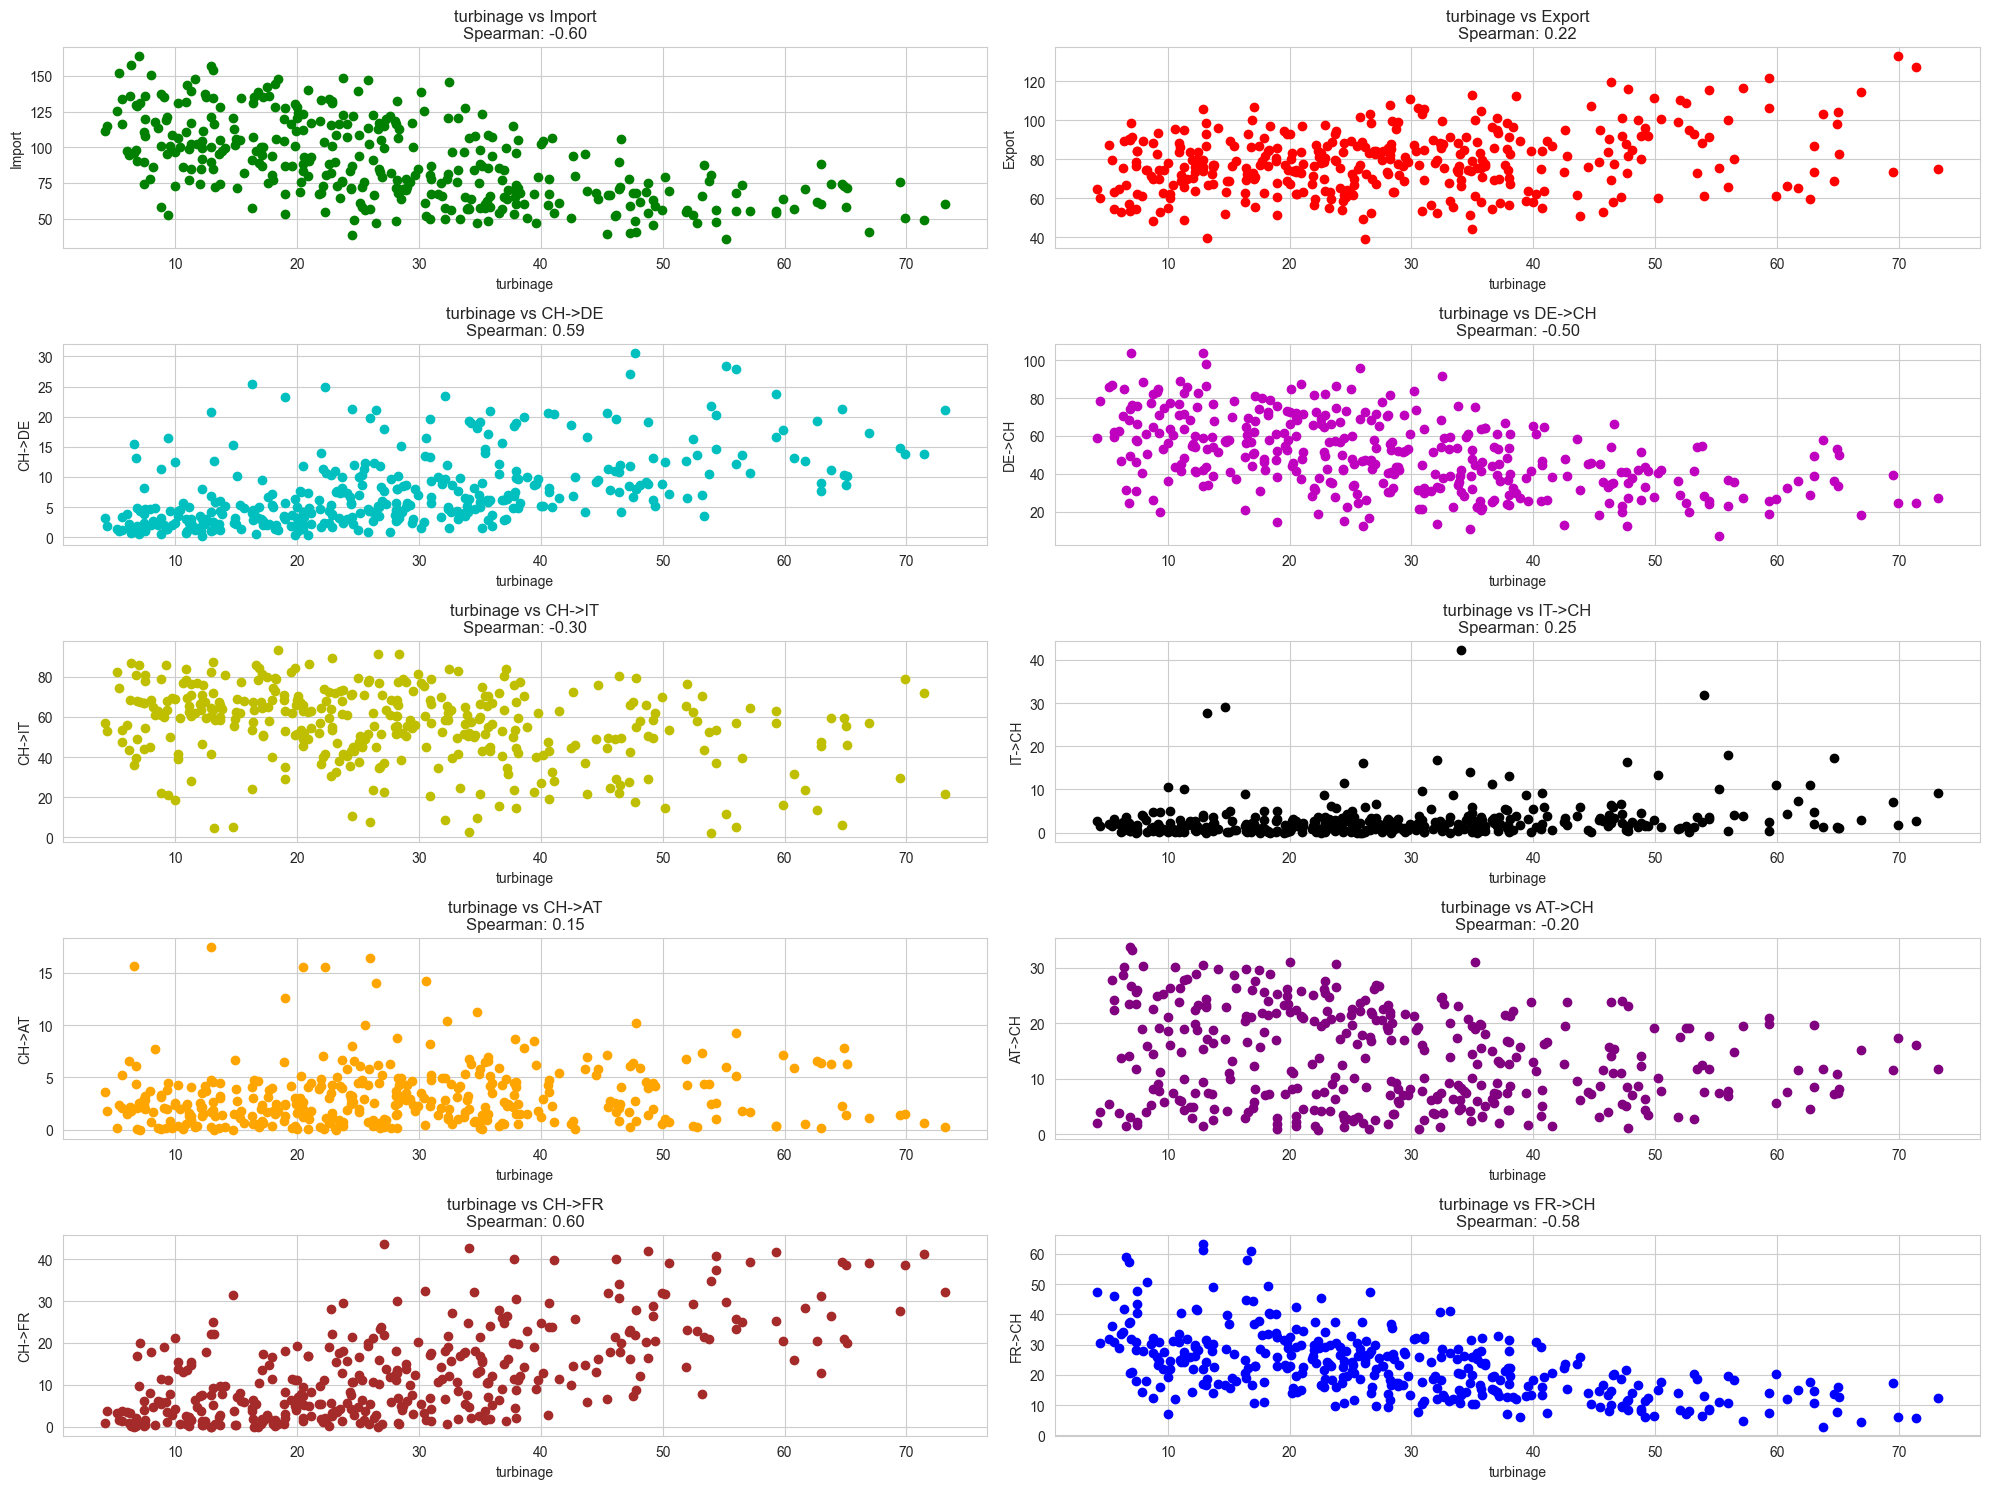

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import pandas as pd



# Créer les listes de colonnes pour chaque différence de prix
columns_mapping = {
    'turbinage': ['Import', 'Export'],
    'turbinage_CH_DE': ['CH->DE', 'DE->CH'],
    'turbinage_CH_IT': ['CH->IT', 'IT->CH'],
    'turbinage_CH_AT': ['CH->AT', 'AT->CH'],
    'turbinage_CH_FR': ['CH->FR', 'FR->CH']
}

# Couleurs différentes pour chaque plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(20, 15))

plot_index = 1  # Index pour subplot

# Parcourir les colonnes de différences de prix et leurs colonnes associées
for price_diff, related_columns in columns_mapping.items():
    for col in related_columns:
        plt.subplot(5, 2, plot_index)  # Organiser les plots en 5 lignes et 2 colonnes
        
        # Calculer le coefficient de corrélation de Spearman
        spearman_corr, _ = spearmanr(new_merged['turbinage'], new_merged[col])
        
        # Créer le scatter plot
        plt.scatter(new_merged['turbinage'], new_merged[col], color=colors[plot_index % len(colors)])
        plt.title(f'turbinage vs {col}\nSpearman: {spearman_corr:.2f}')
        plt.xlabel('turbinage')
        plt.ylabel(col)
        
        plot_index += 1

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


### Analyse et commentaire des graphiques

Les graphiques fournis montrent des nuages de points (scatter plots) représentant la relation entre la variable `turbinage` et différentes variables d'échange d'énergie entre la Suisse et d'autres pays, avec des valeurs de corrélation de Spearman indiquées.

### Observation des graphiques

1. **turbinage vs Import (Spearman: -0.60)** :
    - Il y a une corrélation négative significative. Plus le `turbinage` augmente, plus les importations diminuent.

2. **turbinage vs Export (Spearman: 0.22)** :
    - La corrélation est faible et positive. Une augmentation du `turbinage` est légèrement associée à une augmentation des exportations.

3. **turbinage vs CH->DE (Spearman: 0.59)** :
    - Une corrélation positive modérée. Plus le `turbinage` augmente, plus les exportations de la Suisse vers l'Allemagne augmentent.

4. **turbinage vs DE->CH (Spearman: -0.50)** :
    - Une corrélation négative modérée. Plus le `turbinage` augmente, plus les importations de l'Allemagne vers la Suisse diminuent.

5. **turbinage vs CH->IT (Spearman: -0.30)** :
    - Une corrélation négative faible. Plus le `turbinage` augmente, plus les exportations de la Suisse vers l'Italie diminuent.

6. **turbinage vs IT->CH (Spearman: 0.25)** :
    - Une corrélation positive faible. Plus le `turbinage` augmente, plus les importations de l'Italie vers la Suisse augmentent.

7. **turbinage vs CH->AT (Spearman: 0.15)** :
    - Une corrélation positive très faible. Le `turbinage` a peu d'effet sur les exportations de la Suisse vers l'Autriche.

8. **turbinage vs AT->CH (Spearman: -0.20)** :
    - Une corrélation négative faible. Plus le `turbinage` augmente, plus les importations de l'Autriche vers la Suisse diminuent.

9. **turbinage vs CH->FR (Spearman: 0.60)** :
    - Une corrélation positive modérée à forte. Plus le `turbinage` augmente, plus les exportations de la Suisse vers la France augmentent.

10. **turbinage vs FR->CH (Spearman: -0.58)** :
    - Une corrélation négative modérée à forte. Plus le `turbinage` augmente, plus les importations de la France vers la Suisse diminuent.

### Conclusion

Les graphiques et les corrélations observées montrent clairement comment la production d'énergie hydraulique de la Suisse, mesurée par le `turbinage`, est liée aux flux d'importation et d'exportation d'énergie avec les pays voisins. Les corrélations négatives avec les importations et positives avec les exportations suggèrent que la Suisse est capable de réguler sa production pour maximiser les exportations et minimiser les importations, ce qui est économiquement bénéfique pour le pays.

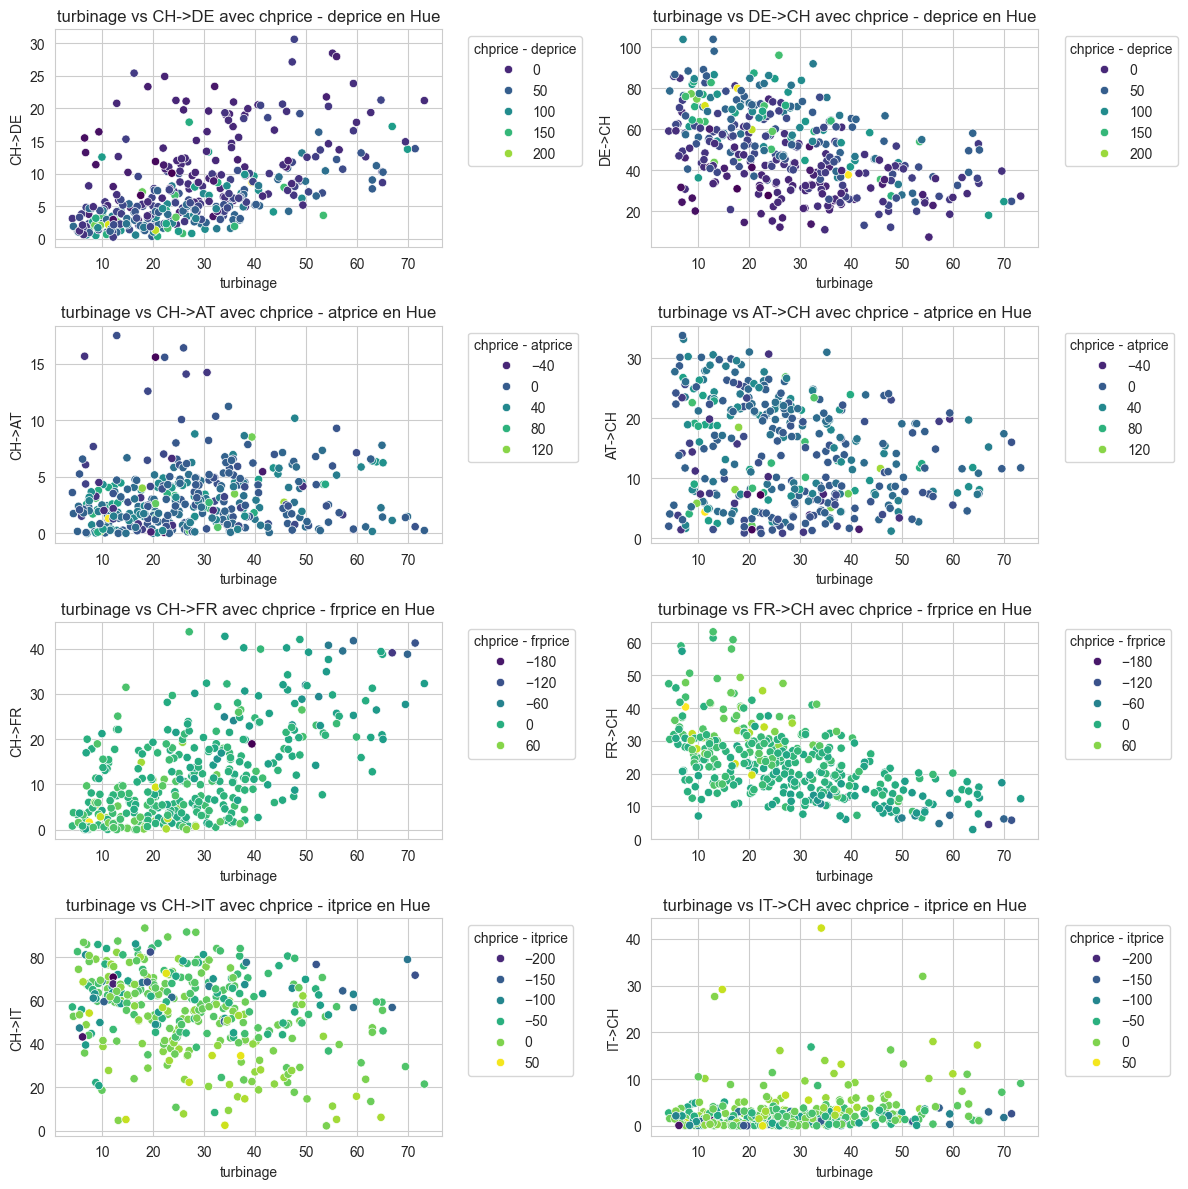

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables y et correspondance avec les variables hue
y_variables = ['CH->DE', 'DE->CH', 'CH->AT', 'AT->CH', 'CH->FR', 'FR->CH', 'CH->IT', 'IT->CH']
hue_variables = ['chprice - deprice', 'chprice - deprice', 'chprice - atprice', 'chprice - atprice', 'chprice - frprice', 'chprice - frprice', 'chprice - itprice', 'chprice - itprice']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(12, 12))

# Parcourir les variables y et hue pour créer les scatter plots
for i, (y_var, hue_var) in enumerate(zip(y_variables, hue_variables)):
    plt.subplot(4, 2, i + 1)
    
    # Créer un scatter plot avec hue
    sns.scatterplot(x='turbinage', y=y_var, hue=hue_var, data=new_merged, palette='viridis')
    plt.title(f'turbinage vs {y_var} avec {hue_var} en Hue')
    plt.xlabel('turbinage')
    plt.ylabel(y_var)
    plt.legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


### Analyse des graphiques

Les graphiques montrent la relation entre le `turbinage` et les échanges d'énergie entre la Suisse et d'autres pays, avec les différences de prix (`chprice - deprice`, etc.) en couleur.

### Observations

1. **Turbinage vs CH->DE (chprice - deprice)** :
    - Augmentation des exportations vers l'Allemagne avec l'augmentation du `turbinage`.
    - Plus la différence de prix est élevée (points verts), plus le `turbinage` et les exportations augmentent.

2. **Turbinage vs DE->CH (chprice - deprice)** :
    - Diminution des importations d'Allemagne avec l'augmentation du `turbinage`.
    - Relation inverse avec la différence de prix : importations diminuent lorsque la différence de prix est élevée.

3. **Turbinage vs CH->AT (chprice - atprice)** :
    - Pas de tendance claire des exportations vers l'Autriche en fonction du `turbinage`.
    - Différence de prix n'a pas d'effet significatif.

4. **Turbinage vs AT->CH (chprice - atprice)** :
    - Importations d'Autriche diminuent légèrement avec l'augmentation du `turbinage`.
    - Importations réduites lorsque les prix en Autriche sont plus élevés.

5. **Turbinage vs CH->FR (chprice - frprice)** :
    - Exportations vers la France augmentent avec l'augmentation du `turbinage`.
    - Exportations plus élevées associées à une plus grande différence de prix.

6. **Turbinage vs FR->CH (chprice - frprice)** :
    - Importations de France diminuent avec l'augmentation du `turbinage`.
    - Importations réduites lorsque les prix en France sont plus élevés.

7. **Turbinage vs CH->IT (chprice - itprice)** :
    - Augmentation des exportations vers l'Italie avec l'augmentation du `turbinage`.
    - Exportations plus élevées associées à une plus grande différence de prix.

8. **Turbinage vs IT->CH (chprice - itprice)** :
    - Importations d'Italie diminuent légèrement avec l'augmentation du `turbinage`.
    - Importations réduites lorsque les prix en Italie sont plus élevés.



Le `turbinage` en Suisse est influencé par les différences de prix de l'énergie avec les pays voisins :

- **Exportations (CH->Pays)** : Augmentent avec l'augmentation du `turbinage`, surtout quand les prix suisses sont plus compétitifs.
- **Importations (Pays->CH)** : Diminuent avec l'augmentation du `turbinage`, surtout quand les prix suisses sont plus élevés.

La Suisse utilise le `turbinage` pour maximiser les exportations et minimiser les importations selon les conditions du marché énergétique européen.

### Analyse de l'évolution du turbinage en fonction des prix

Pour comprendre comment le turbinage évolue en fonction des prix et comment la Suisse gère cela, examinons les points suivants à partir des graphiques fournis :

1. **Relation entre le turbinage et les différences de prix (Hue)** :
    - Les différences de prix (`chprice - deprice`, `chprice - atprice`, etc.) sont représentées par des couleurs sur les graphiques. Les points plus verts indiquent une plus grande différence de prix, tandis que les points plus violets indiquent une plus petite différence de prix (ou une différence négative).
    - Une tendance générale se dégage où le turbinage augmente lorsque la différence de prix est plus élevée (les points verts ont tendance à être associés à des valeurs plus élevées de `turbinage`).

2. **Exportations (CH->Pays) et différences de prix** :
    - **Exportations vers l'Allemagne (CH->DE)**, la France (CH->FR), et l'Italie (CH->IT) montrent une augmentation avec l'augmentation du turbinage. Lorsque la différence de prix entre la Suisse et ces pays est positive (Suisse a des prix plus bas), le turbinage est plus élevé, favorisant les exportations.
    - Cela indique que la Suisse augmente sa production d'énergie hydraulique pour exporter davantage lorsque les prix suisses sont plus compétitifs par rapport aux pays voisins.

3. **Importations (Pays->CH) et différences de prix** :
    - **Importations depuis l'Allemagne (DE->CH)**, la France (FR->CH), et l'Italie (IT->CH) diminuent avec l'augmentation du turbinage. Lorsque la différence de prix est positive (Suisse a des prix plus bas), le turbinage est plus élevé, réduisant la nécessité d'importer de l'énergie.
    - Cela montre que la Suisse réduit ses importations lorsque sa propre production d'énergie est plus rentable en raison de prix compétitifs.

### Gestion du turbinage par la Suisse

La Suisse semble gérer son turbinage de manière stratégique pour optimiser les avantages économiques liés aux fluctuations des prix de l'énergie. Voici comment cela pourrait se traduire en actions spécifiques :

1. **Optimisation des exportations** :
    - **Production accrue en période de prix favorables** : La Suisse augmente sa production hydroélectrique lorsque ses prix sont plus bas que ceux des pays voisins, ce qui lui permet de maximiser ses exportations.
    - **Utilisation des réservoirs de stockage** : En période de demande élevée et de prix favorables, la Suisse peut libérer de l'eau stockée dans ses réservoirs pour augmenter la production d'énergie.

2. **Réduction des importations** :
    - **Substitution des importations par la production locale** : Lorsque les prix de l'énergie en Suisse sont plus bas, la Suisse réduit ses importations en augmentant la production locale, ce qui est plus économique.
    - **Gestion de la demande interne** : En ajustant la production en fonction des prix, la Suisse peut également mieux gérer la demande interne et réduire les coûts d'importation.


### Conclusion

La gestion du turbinage en Suisse est une approche stratégique bien pensée, influencée par les fluctuations des prix de l'énergie sur le marché européen. En augmentant sa production d'énergie hydraulique lorsque les prix sont favorables, la Suisse maximise ses exportations et réduit ses importations, optimisant ainsi ses avantages économiques. Cette flexibilité permet à la Suisse de s'adapter aux conditions du marché et de gérer efficacement sa production d'énergie hydroélectrique.

In [38]:
import pandas as pd

def calcul_demande_residuelle(df):
    """
    Cette fonction calcule la production fatale totale, la demande totale et la demande résiduelle.

    Parameters:
    df (pd.DataFrame): DataFrame contenant les données de consommation et de production.

    Returns:
    pd.DataFrame: DataFrame avec les colonnes 'production_fatale', 'demande_totale' et 'demande_residuelle' ajoutées.
    """
    # Identifier les colonnes de production fatale
    cols_fatale = [col for col in df.columns if 'Solar' in col or 'Wind' in col]
    
    # Calculer la production fatale totale
    df['production_fatale'] = df[cols_fatale].sum(axis=1)
    
    # Calculer la demande totale comme la somme de toutes les colonnes existantes
    df['demande_totale'] = df.sum(axis=1)
    
    # Calculer la demande résiduelle
    df['demande_residuelle'] = df['demande_totale'] - df['production_fatale']
    
    return df[['demande_residuelle']]

In [39]:
deconso=pd.read_csv('data/raw_consumption_by_src_DE.csv', index_col=0)
deconso.index = pd.to_datetime(deconso.index)
deconso=deconso.resample('D').sum()/1000
deconso=deconso.loc['2022-01-01':'2022-12-31']


In [40]:
demande_residuelle_de=calcul_demande_residuelle(deconso)
demande_residuelle_de.rename(columns={'demande_residuelle':'demande_residuelle_de'}, inplace=True)
demande_residuelle_de

C:\Users\souha\AppData\Local\Temp\ipykernel_28252\2440606043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demande_residuelle_de.rename(columns={'demande_residuelle':'demande_residuelle_de'}, inplace=True)


demande_residuelle_de
2022-01-01            1132.437600
2022-01-02            1263.690568
2022-01-03            1506.178298
2022-01-04            1457.383212
2022-01-05            1629.349542
...                           ...
2022-12-27            1303.391427
2022-12-28            1371.514059
2022-12-29            1344.296825
2022-12-30            1310.211469
2022-12-31            1224.915550

[365 rows x 1 columns]

In [41]:
frconso=pd.read_csv('data/raw_consumption_by_src_FR.csv', index_col=0)
frconso.index=pd.to_datetime(frconso.index)
frconso=frconso.resample('D').sum()/1000
frconso=frconso.loc['2022-01-01':'2022-12-31']

In [45]:
demande_residuelle_fr=calcul_demande_residuelle(frconso)
demande_residuelle_fr.rename(columns={'demande_residuelle':'demande_residuelle_fr'}, inplace=True)
demande_residuelle_fr

C:\Users\souha\AppData\Local\Temp\ipykernel_28252\944766897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demande_residuelle_fr.rename(columns={'demande_residuelle':'demande_residuelle_fr'}, inplace=True)


demande_residuelle_fr
2022-01-01            4000.049762
2022-01-02            4341.430382
2022-01-03            4704.394773
2022-01-04            4832.725989
2022-01-05            5214.060882
...                           ...
2022-12-27            4268.709271
2022-12-28            4472.452501
2022-12-29            4264.022386
2022-12-30            4205.880933
2022-12-31            4056.474092

[365 rows x 1 columns]

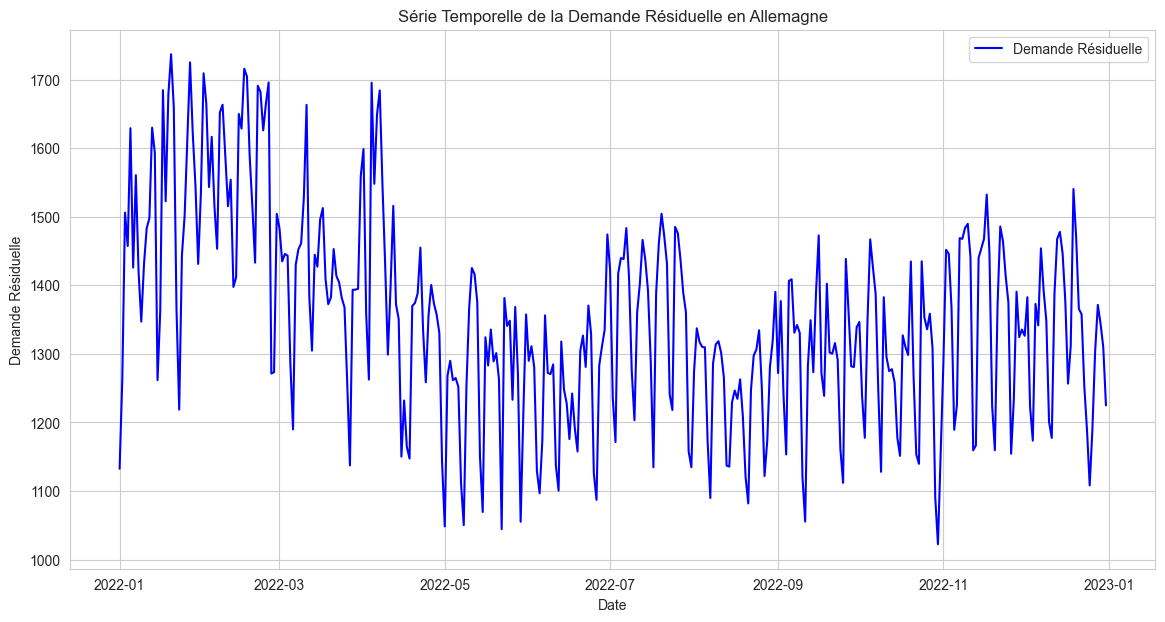

In [49]:
# Visualiser la série temporelle de la demande résiduelle
plt.figure(figsize=(14, 7))
plt.plot(demande_residuelle_de.index, demande_residuelle_de['demande_residuelle_de'], label='Demande Résiduelle', color='b')
plt.title('Série Temporelle de la Demande Résiduelle en Allemagne')
plt.xlabel('Date')
plt.ylabel('Demande Résiduelle')
plt.legend()
plt.grid(True)
plt.show()

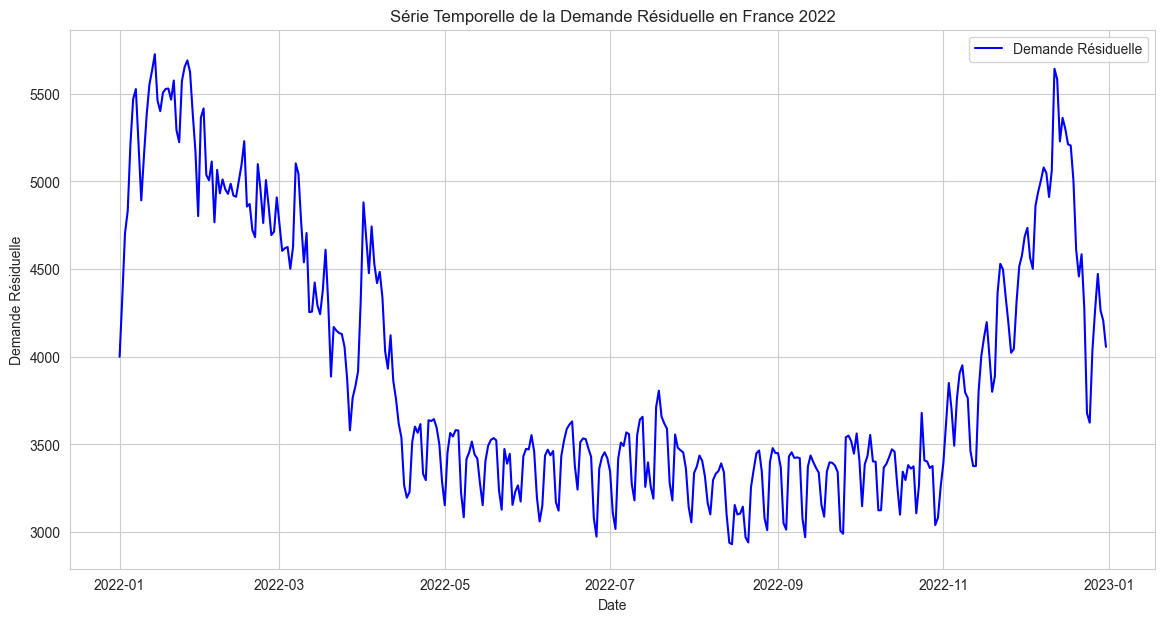

In [48]:
# Visualiser la série temporelle de la demande résiduelle
plt.figure(figsize=(14, 7))
plt.plot(demande_residuelle_fr.index, demande_residuelle_fr['demande_residuelle_fr'], label='Demande Résiduelle', color='b')
plt.title('Série Temporelle de la Demande Résiduelle en France 2022')
plt.xlabel('Date')
plt.ylabel('Demande Résiduelle')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
deprod=pd.read_csv('data/production_DE.csv', index_col=0)

deprod.index = pd.to_datetime(deprod.index)
deprod=deprod.resample('D').sum()/1000
deprod=deprod.loc['2022-01-01':'2022-12-31']
prod_pv_de=deprod['Solar_DE']

frprod=pd.read_csv('data/production_FR.csv', index_col=0)

frprod.index = pd.to_datetime(frprod.index)
frprod=frprod.resample('D').sum()/1000
frprod=frprod.loc['2022-01-01':'2022-12-31']

In [51]:
prod_pv_de

2022-01-01    34.436028
2022-01-02    25.637320
2022-01-03    22.638492
2022-01-04    10.520618
2022-01-05    26.399532
                ...    
2022-12-27    50.861069
2022-12-28    32.012968
2022-12-29    32.260932
2022-12-30    50.321337
2022-12-31    34.732156
Freq: D, Name: Solar_DE, Length: 365, dtype: float64

In [52]:
prod_nuc_fr=frprod['Nuclear_FR']
prod_nuc_fr

2022-01-01     956.207010
2022-01-02     941.985989
2022-01-03    1009.890002
2022-01-04    1076.936002
2022-01-05    1098.731998
                 ...     
2022-12-27     885.956001
2022-12-28     875.021004
2022-12-29     774.974989
2022-12-30     729.076005
2022-12-31     629.338011
Freq: D, Name: Nuclear_FR, Length: 365, dtype: float64

In [53]:
merged_final = pd.concat([new_merged, prod_nuc_fr, prod_pv_de, demande_residuelle_fr,demande_residuelle_de], axis=1)

In [54]:
merged_final

turbinage     chprice     deprice     itprice     atprice  \
2022-01-01        7.4   92.277500   62.812708  150.689167   65.002396   
2022-01-02        6.8   72.682917   67.980625  166.910000   97.776354   
2022-01-03       19.8  155.737083  108.635937  192.664167  151.602604   
2022-01-04       19.9  170.802083  155.401146  165.726667  158.409167   
2022-01-05       36.0  178.214167  121.000000  192.537917  137.001771   
...               ...         ...         ...         ...         ...   
2022-12-27        9.6  126.882500   87.060625  209.479583  128.062187   
2022-12-28        8.3   77.356667   70.505833  175.791667   97.505521   
2022-12-29       19.5   44.105417   17.195417  205.406250   60.216563   
2022-12-30       18.9   26.036250   21.797813  179.507917   37.938750   
2022-12-31        6.2    7.258750   -4.166771  224.324583    5.217187   

               frprice  chprice - deprice  chprice - itprice  \
2022-01-01   87.080833          29.464792         -58.411667   
2022-01-02   49.116250           4.702292         -94.227083   
2022-01-03   92.122083          47.101146         -36.927083   
2022-01-04  156.298333          15.400937           5.075417   
2022-01-05  185.556667          57.214167         -14.323750   
...                ...                ...                ...   
2022-12-27  122.794167          39.821875         -82.597083   
2022-12-28   51.537083           6.850833         -98.435000   
2022-12-29   31.525833          26.910000        -161.300833   
2022-12-30   18.475833           4.238437        -153.471667   
2022-12-31    4.377083          11.425521        -217.065833   

            chprice - atprice  chprice - frprice  ...     AT->CH     CH->FR  \
2022-01-01          27.275104           5.196667  ...  23.495282   3.872852   
2022-01-02         -25.093438          23.566667  ...  23.394865   2.111189   
2022-01-03           4.134479          63.615000  ...  26.235621   4.976819   
2022-01-04          12.392917          14.503750  ...  23.428935   3.961266   
2022-01-05          41.212396          -7.342500  ...  18.037543  12.213762   
...                       ...                ...  ...        ...        ...   
2022-12-27          -1.179688           4.088333  ...  25.192168   7.788422   
2022-12-28         -20.148854          25.819583  ...  15.809779   0.484804   
2022-12-29         -16.111146          12.579583  ...  23.340254   6.261114   
2022-12-30         -11.902500           7.560417  ...  16.933204   0.673331   
2022-12-31           2.041563           2.881667  ...  13.788968   0.799571   

               FR->CH     CH->IT    IT->CH  demande_residuelle   Nuclear_FR  \
2022-01-01  28.120057  67.225547  0.721643          173.748990   956.207010   
2022-01-02  37.150726  81.134488  0.796812          174.393176   941.985989   
2022-01-03  30.726884  84.291135  0.045818          186.703133  1009.890002   
2022-01-04  28.853466  66.235600  0.684455          189.276824  1076.936002   
2022-01-05  23.316417  56.368651  1.628240          203.782397  1098.731998   
...               ...        ...       ...                 ...          ...   
2022-12-27  21.954147  49.913839  0.913906          183.471122   885.956001   
2022-12-28  50.665281  61.171586  0.129176          189.235219   875.021004   
2022-12-29  31.605741  82.435618  0.030983          173.732475   774.974989   
2022-12-30  40.015298  68.614683  0.071617          175.716681   729.076005   
2022-12-31  33.542383  43.266242  0.107069          173.672226   629.338011   

             Solar_DE  demande_residuelle_fr  demande_residuelle_de  
2022-01-01  34.436028            4000.049762            1132.437600  
2022-01-02  25.637320            4341.430382            1263.690568  
2022-01-03  22.638492            4704.394773            1506.178298  
2022-01-04  10.520618            4832.725989            1457.383212  
2022-01-05  26.399532            5214.060882            1629.349542  
...               ...                    ...    

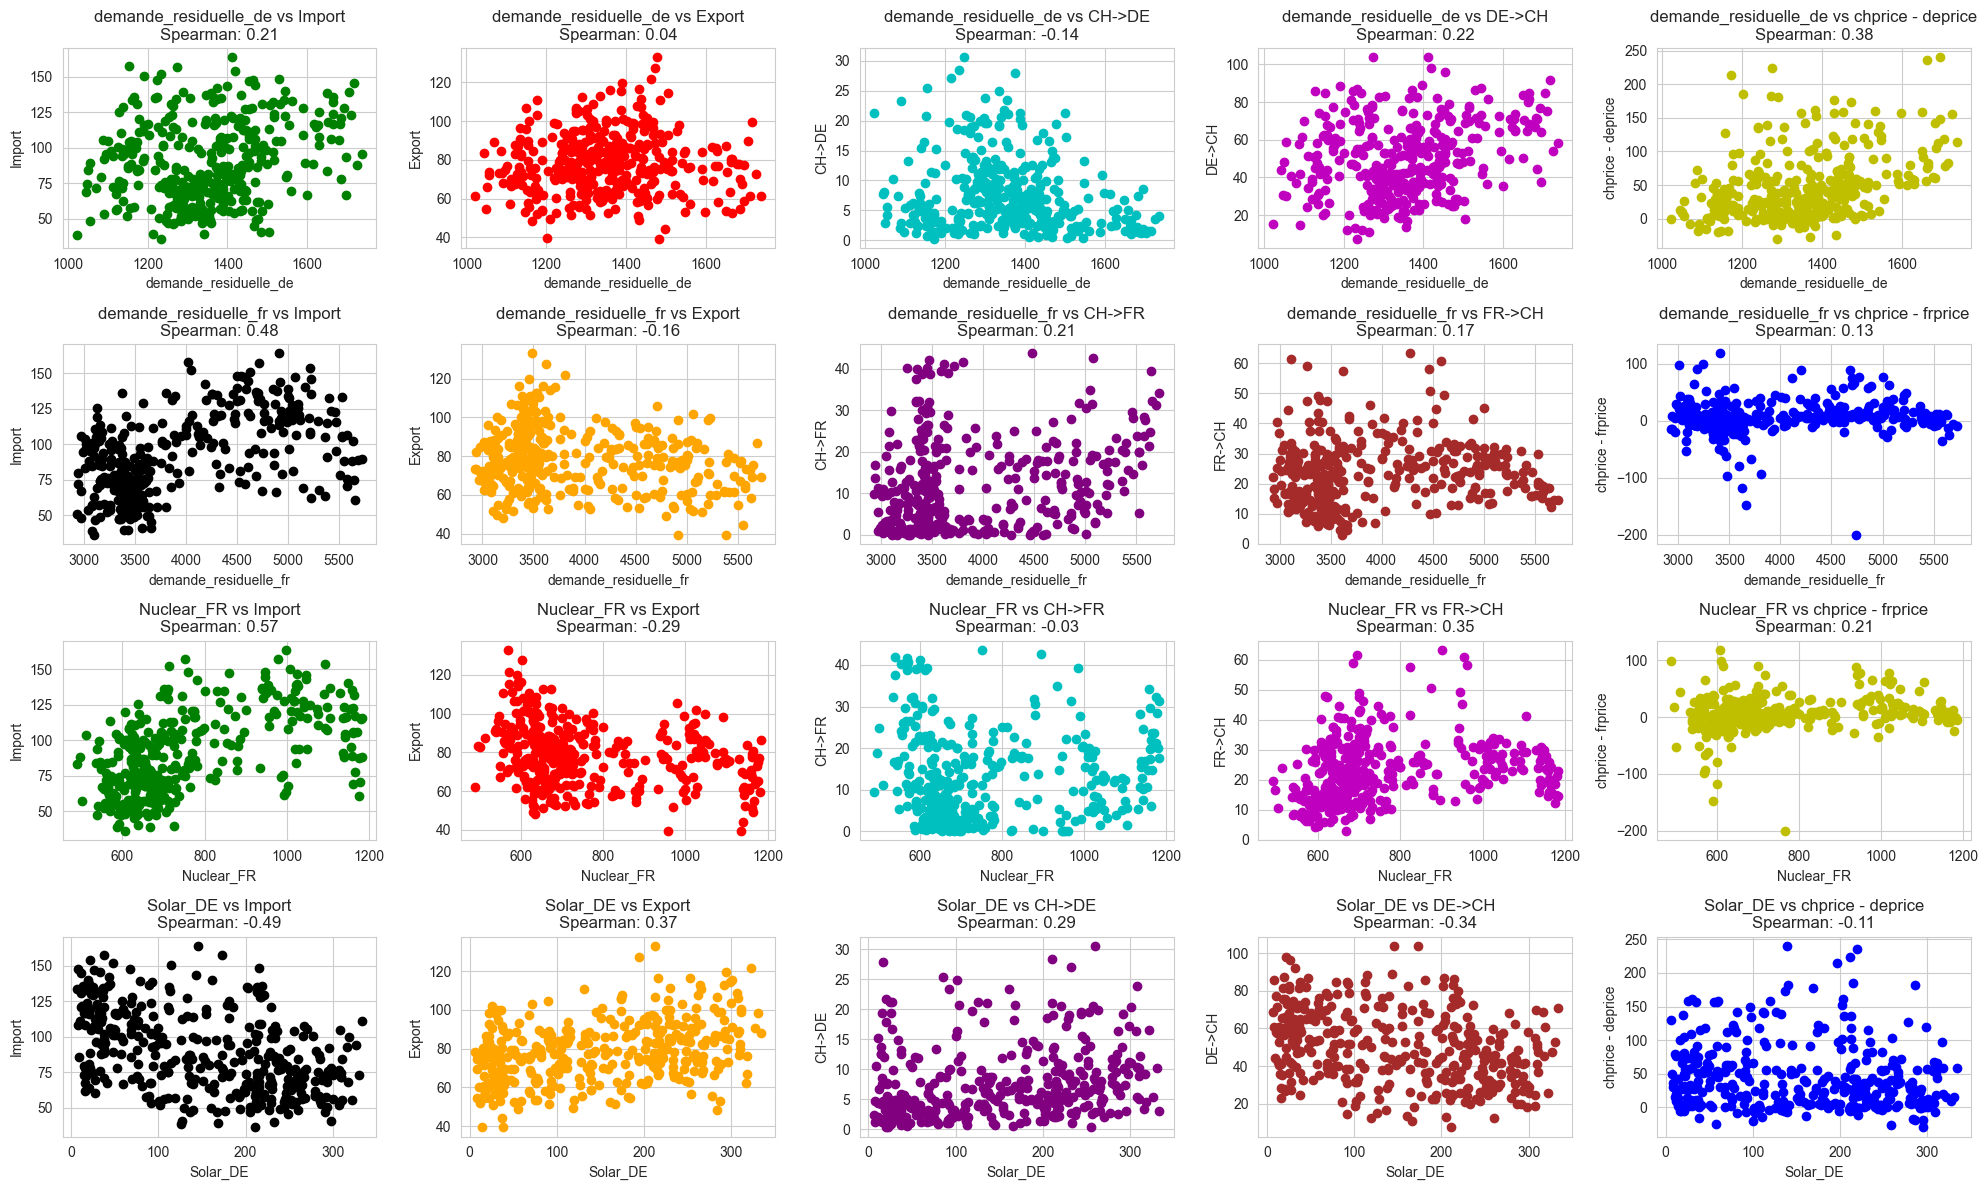

In [55]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Créer les listes de colonnes pour chaque différence de prix
columns_mapping = {
    'demande_residuelle_de': ['Import', 'Export', 'CH->DE', 'DE->CH','chprice - deprice'],
    'demande_residuelle_fr': ['Import', 'Export', 'CH->FR', 'FR->CH','chprice - frprice'],
    'Nuclear_FR': ['Import', 'Export', 'CH->FR', 'FR->CH','chprice - frprice'],
    'Solar_DE': ['Import', 'Export', 'CH->DE', 'DE->CH','chprice - deprice']
    
}

# Couleurs différentes pour chaque plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(20, 12))

plot_index = 1  # Index pour subplot

# Parcourir les colonnes de différences de prix et leurs colonnes associées
for variable, related_columns in columns_mapping.items():
    for col in related_columns:
        plt.subplot(4, 5, plot_index)  # Organiser les plots en 3 lignes et 4 colonnes
        
        # Calculer le coefficient de corrélation de Spearman
        spearman_corr, _ = spearmanr(merged_final[variable], merged_final[col])
        
        # Créer le scatter plot
        plt.scatter(merged_final[variable], merged_final[col], color=colors[plot_index % len(colors)])
        plt.title(f'{variable} vs {col}\nSpearman: {spearman_corr:.2f}')
        plt.xlabel(variable)
        plt.ylabel(col)
        
        plot_index += 1

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()





### Interprétations et Commentaires

1. **Demande Résiduelle** :
    - **Allemagne** : Une demande résiduelle plus élevée en Allemagne est associée à une légère augmentation des importations et des exportations entre la Suisse et l'Allemagne, et une hausse modérée des prix en Suisse par rapport à l'Allemagne.
    - **France** : Une demande résiduelle plus élevée en France est associée à une augmentation des importations depuis la France et une faible réduction des exportations vers la France. Les prix suisses semblent légèrement influencés par la demande résiduelle française.

2. **Production Nucléaire** :
    - Une production nucléaire plus élevée en France est fortement associée à une augmentation des importations suisses et à une diminution des exportations suisses vers la France. Les prix en Suisse par rapport à la France montrent une faible corrélation positive.

3. **Production Solaire** :
    - En Allemagne, une production solaire plus élevée est associée à une réduction modérée des importations suisses et à une augmentation des exportations suisses vers l'Allemagne. Les prix montrent une très faible corrélation avec la production solaire.

### Conclusion

L'analyse montre que la production d'énergie (nucléaire et solaire) et la demande résiduelle en Allemagne et en France ont des influences variées sur les importations et exportations d'électricité de la Suisse. En général :

- **Demande résiduelle élevée** : Augmente les importations de la Suisse depuis ces pays.
- **Production nucléaire française élevée** : Augmente les importations suisses depuis la France et réduit les exportations vers la France.
- **Production solaire allemande élevée** : Réduit les importations suisses depuis l'Allemagne et augmente les exportations vers l'Allemagne.

Ces observations suggèrent que la Suisse ajuste sa stratégie de vente d'électricité en fonction de la production et de la demande dans les pays voisins pour maximiser les avantages économiques.



### Synthèse des Résultats

1. **Production Nucléaire Française Élevée** :
    - **Importations Suisses depuis la France** : Augmentent significativement.
    - **Exportations Suisses vers la France** : Réduites.
    - Cela montre que lorsque la France augmente sa production nucléaire, la Suisse importe plus d'électricité française et exporte moins vers la France. Ce comportement est conforme aux attentes, car une production nationale excédentaire en France réduit sa demande d'importations et favorise ses exportations.

2. **Demande Résiduelle Allemande et Française** :
    - **Allemagne** : Une augmentation de la demande résiduelle en Allemagne n'a pas d'impact significatif sur les exportations vers la Suisse. Cela suggère que les processus d'importation/exportation entre la Suisse et l'Allemagne ne sont pas fortement influencés par la demande résiduelle allemande.
    - **France** : L'augmentation de la demande résiduelle en France montre une légère augmentation des importations de la Suisse, mais une faible corrélation avec les exportations. Cela suggère que, bien que la demande résiduelle française ait une certaine influence, elle n'est pas un facteur dominant dans les échanges d'électricité avec la Suisse.

3. **Production Solaire Allemande Élevée** :
    - **Importations Suisses depuis l'Allemagne** : Diminuent de manière significative.
    - **Exportations Suisses vers l'Allemagne** : Augmentent modérément.
    - Cela montre que lorsque la production solaire allemande augmente, l'Allemagne réduit ses importations d'électricité de la Suisse et augmente ses exportations vers la Suisse. Cela indique une certaine influence de la production solaire sur les échanges d'électricité.

### Conclusion

Les résultats suggèrent que :

- La production nucléaire en France a une influence significative sur les échanges d'électricité avec la Suisse. Une production nucléaire élevée en France favorise les importations suisses et réduit les exportations suisses vers la France.
- La demande résiduelle en Allemagne et en France a une influence limitée sur les échanges d'électricité avec la Suisse. Les processus d'importation/exportation ne sont pas fortement impactés par les variations de la demande résiduelle nationale.
- La production solaire en Allemagne influence les importations et exportations d'électricité, avec une production solaire élevée réduisant les importations suisses et augmentant les exportations vers l'Allemagne.

En résumé, la Suisse ajuste ses importations et exportations principalement en réponse aux variations de la production nationale (comme la production nucléaire en France et la production solaire en Allemagne) plutôt qu'à la demande résiduelle nationale. Cette observation souligne l'importance de la production nationale dans les stratégies d'importation/exportation d'électricité entre les pays.


Les observations suggèrent que les processus d'importation et d'exportation entre la Suisse et la France ou l'Allemagne ne sont pas fortement influencés par la demande résiduelle nationale de ces pays. Voici une clarification de l'analyse basée sur cette observation :



Les processus d'importation et d'exportation d'électricité entre la Suisse et la France/Allemagne ne sont pas fortement influencés par la demande résiduelle nationale de ces pays. En détail :

1. **Allemagne** :
    - **Importations** : Augmentent légèrement avec l'augmentation de la demande résiduelle.
    - **Exportations** : Ne sont pas significativement affectées par la demande résiduelle.
    - **Prix** : Modérément affectés par la demande résiduelle.

2. **France** :
    - **Importations** : Augmentent modérément avec l'augmentation de la demande résiduelle.
    - **Exportations** : Légèrement réduites avec l'augmentation de la demande résiduelle.
    - **Prix** : Très faiblement affectés par la demande résiduelle.

### Implications

- **Allemagne** : La Suisse peut continuer à exporter vers l'Allemagne sans être fortement contrainte par la demande résiduelle allemande. Les importations suisses augmentent légèrement avec une demande résiduelle plus élevée, suggérant une flexibilité dans la gestion des flux d'électricité.
- **France** : Les importations suisses augmentent plus fortement avec la demande résiduelle française, mais les exportations ne sont que légèrement réduites. Cela montre une certaine indépendance des flux d'électricité par rapport à la demande résiduelle.

En résumé, la demande résiduelle nationale n'est pas le facteur principal influençant les flux d'import/export d'électricité entre la Suisse et ses voisins. D'autres facteurs, comme la production nationale (nucléaire et solaire), peuvent avoir une influence plus notable.
"""



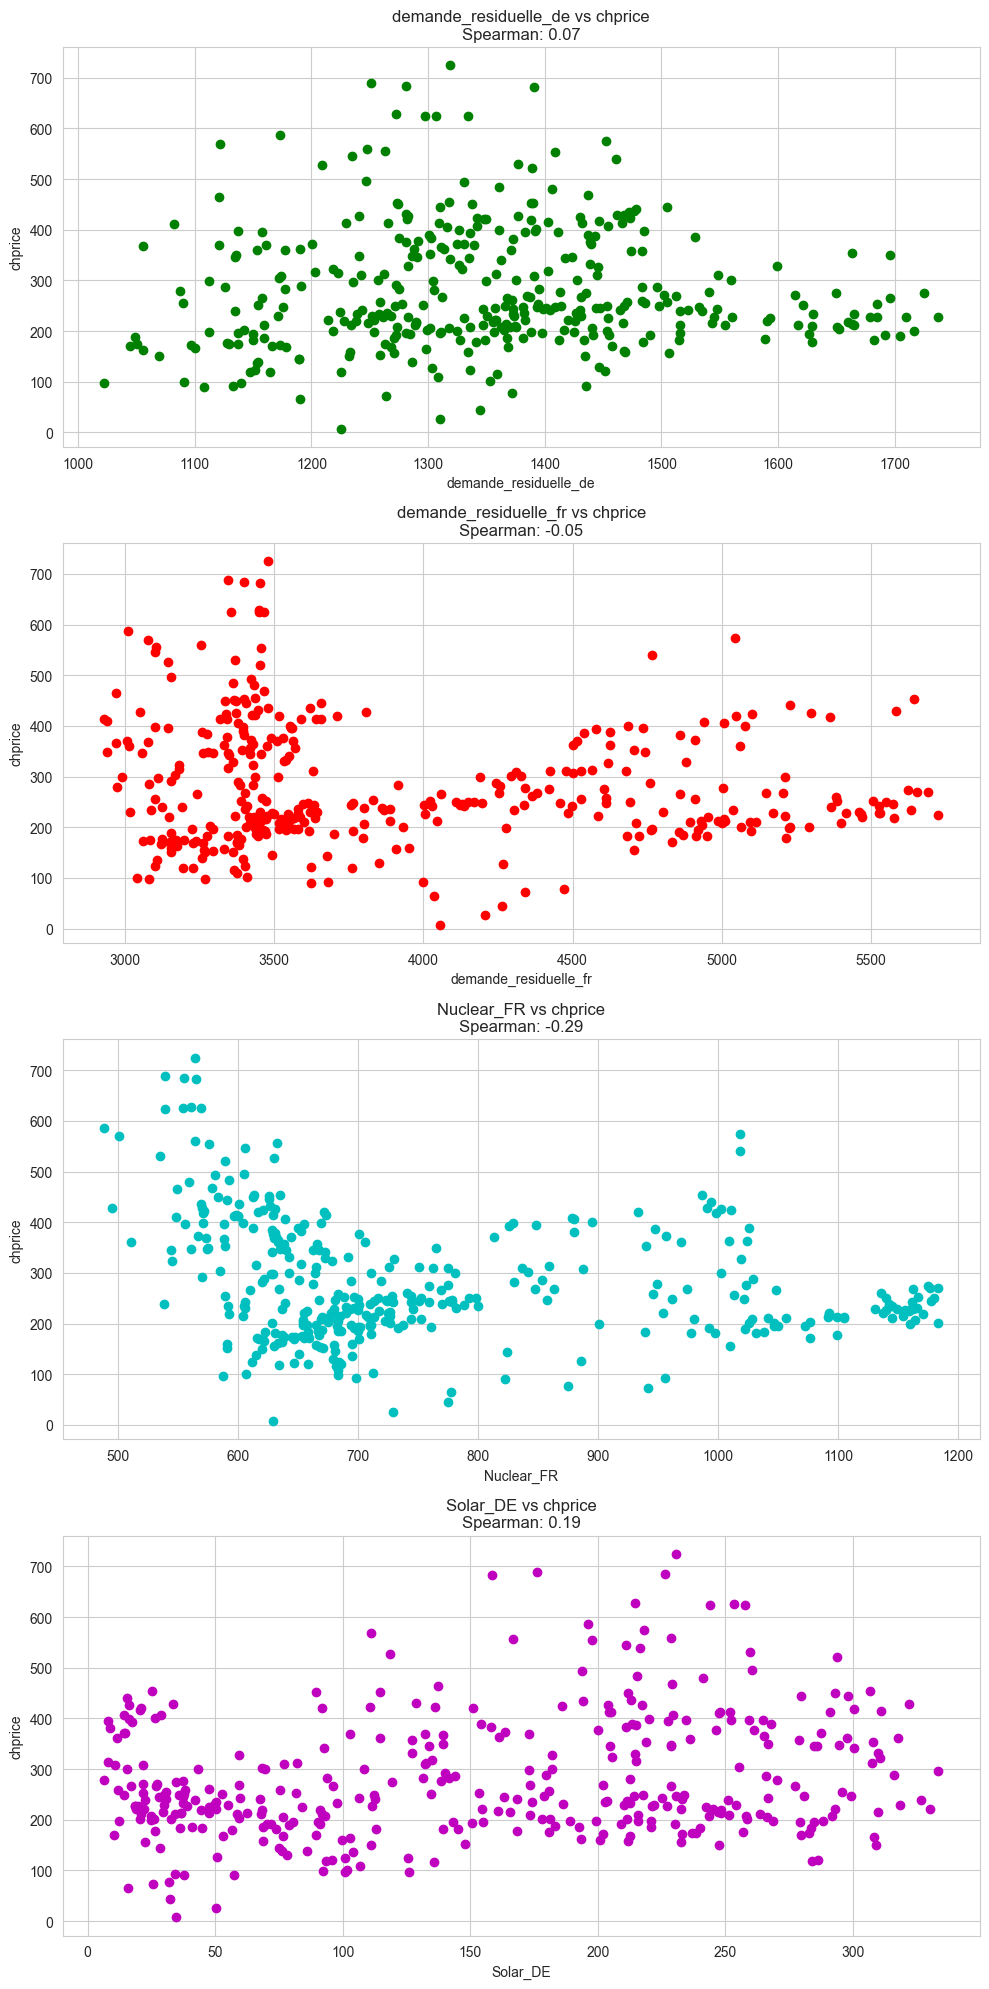

In [56]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Créer les listes de colonnes pour chaque différence de prix
columns_mapping = {
    'demande_residuelle_de': ['chprice'],
    'demande_residuelle_fr': ['chprice'],
    'Nuclear_FR'           : ['chprice'],
    'Solar_DE'             : ['chprice']
    
}

# Couleurs différentes pour chaque plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Taille de la figure pour une meilleure visualisation
plt.figure(figsize=(10, 20))

plot_index = 1  # Index pour subplot

# Parcourir les colonnes de différences de prix et leurs colonnes associées
for variable, related_columns in columns_mapping.items():
    for col in related_columns:
        plt.subplot(4, 1, plot_index)  # Organiser les plots en 3 lignes et 4 colonnes
        
        # Calculer le coefficient de corrélation de Spearman
        spearman_corr, _ = spearmanr(merged_final[variable], merged_final[col])
        
        # Créer le scatter plot
        plt.scatter(merged_final[variable], merged_final[col], color=colors[plot_index % len(colors)])
        plt.title(f'{variable} vs {col}\nSpearman: {spearman_corr:.2f}')
        plt.xlabel(variable)
        plt.ylabel(col)
        
        plot_index += 1

plt.tight_layout()  # Pour éviter le chevauchement des plots
plt.show()


In [57]:
merged_final.columns

Index(['turbinage', 'chprice', 'deprice', 'itprice', 'atprice', 'frprice',
       'chprice - deprice', 'chprice - itprice', 'chprice - atprice',
       'chprice - frprice', 'Import', 'Export', 'CH->DE', 'DE->CH', 'CH->AT',
       'AT->CH', 'CH->FR', 'FR->CH', 'CH->IT', 'IT->CH', 'demande_residuelle',
       'Nuclear_FR', 'Solar_DE', 'demande_residuelle_fr',
       'demande_residuelle_de'],
      dtype='object')

In [58]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Fonction pour tester la causalité de Granger pour plusieurs variables
def granger_causality_tests(df, target, max_lag=5):
    results = {}
    for col in df.columns:
        if col != target:
            print(f"Testing Granger causality for {col} -> {target}")
            test_result = grangercausalitytests(df[[col, target]], max_lag)
            p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lag)]
            results[col] = p_values
    return results


# Exécuter le test de causalité de Granger pour toutes les variables par rapport à 'chprice'
results = granger_causality_tests(merged_final, 'chprice', max_lag=5)

# Afficher les résultats
for key, value in results.items():
    print(f"{key}: {value}")


Testing Granger causality for turbinage -> chprice

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9459  , p=0.0870  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=2.9704  , p=0.0848  , df=1
likelihood ratio test: chi2=2.9583  , p=0.0854  , df=1
parameter F test:         F=2.9459  , p=0.0870  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1290  , p=0.0064  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=10.4012 , p=0.0055  , df=2
likelihood ratio test: chi2=10.2550 , p=0.0059  , df=2
parameter F test:         F=5.1290  , p=0.0064  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1671  , p=0.0245  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=9.6888  , p=0.0214  , df=3
likelihood ratio test: chi2=9.5614  , p=0.0227  , df=3
parameter F test:         F=3.1671  , p=0.0245  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero)

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Fonction pour tester la causalité de Granger pour plusieurs variables
def granger_causality_tests(df, target, max_lag=5):
    results = {}
    for col in df.columns:
        if col != target:
            print(f"Testing Granger causality for {col} -> {target}")
            test_result = grangercausalitytests(df[[col, target]], max_lag)
            p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lag)]
            results[col] = p_values
    return results, max_lag


# Exécuter le test de causalité de Granger pour toutes les variables par rapport à 'chprice'
results, max_lag = granger_causality_tests(merged_final, 'chprice', max_lag=5)

# Afficher les résultats
for key, value in results.items():
    print(f"{key}: {value}")

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results, index=[f'lag_{i+1}' for i in range(max_lag)])
print("\nRésultats du test de causalité de Granger")

results_df
# Sauvegarder les résultats dans un fichier CSV (facultatif)
#results_df.to_csv('granger_causality_results.csv', index=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X=merged_final.drop(['chprice'], axis=1)
y=merged_final['chprice']
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X, y)

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



X=merged_final.drop(['chprice'], axis=1)
y=merged_final['chprice']

# Entraîner un modèle de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extraire l'importance des variables
importances = model.feature_importances_
features = X.columns

# Créer un DataFrame pour visualiser les importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des variables
print(feature_importance_df)

# Visualiser l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Importance des variables", dataframe=feature_importance_df)


In [60]:
merged_final.to_csv('data/mergeprice.csv')

In [61]:
merged_final

turbinage     chprice     deprice     itprice     atprice  \
2022-01-01        7.4   92.277500   62.812708  150.689167   65.002396   
2022-01-02        6.8   72.682917   67.980625  166.910000   97.776354   
2022-01-03       19.8  155.737083  108.635937  192.664167  151.602604   
2022-01-04       19.9  170.802083  155.401146  165.726667  158.409167   
2022-01-05       36.0  178.214167  121.000000  192.537917  137.001771   
...               ...         ...         ...         ...         ...   
2022-12-27        9.6  126.882500   87.060625  209.479583  128.062187   
2022-12-28        8.3   77.356667   70.505833  175.791667   97.505521   
2022-12-29       19.5   44.105417   17.195417  205.406250   60.216563   
2022-12-30       18.9   26.036250   21.797813  179.507917   37.938750   
2022-12-31        6.2    7.258750   -4.166771  224.324583    5.217187   

               frprice  chprice - deprice  chprice - itprice  \
2022-01-01   87.080833          29.464792         -58.411667   
2022-01-02   49.116250           4.702292         -94.227083   
2022-01-03   92.122083          47.101146         -36.927083   
2022-01-04  156.298333          15.400937           5.075417   
2022-01-05  185.556667          57.214167         -14.323750   
...                ...                ...                ...   
2022-12-27  122.794167          39.821875         -82.597083   
2022-12-28   51.537083           6.850833         -98.435000   
2022-12-29   31.525833          26.910000        -161.300833   
2022-12-30   18.475833           4.238437        -153.471667   
2022-12-31    4.377083          11.425521        -217.065833   

            chprice - atprice  chprice - frprice  ...     AT->CH     CH->FR  \
2022-01-01          27.275104           5.196667  ...  23.495282   3.872852   
2022-01-02         -25.093438          23.566667  ...  23.394865   2.111189   
2022-01-03           4.134479          63.615000  ...  26.235621   4.976819   
2022-01-04          12.392917          14.503750  ...  23.428935   3.961266   
2022-01-05          41.212396          -7.342500  ...  18.037543  12.213762   
...                       ...                ...  ...        ...        ...   
2022-12-27          -1.179688           4.088333  ...  25.192168   7.788422   
2022-12-28         -20.148854          25.819583  ...  15.809779   0.484804   
2022-12-29         -16.111146          12.579583  ...  23.340254   6.261114   
2022-12-30         -11.902500           7.560417  ...  16.933204   0.673331   
2022-12-31           2.041563           2.881667  ...  13.788968   0.799571   

               FR->CH     CH->IT    IT->CH  demande_residuelle   Nuclear_FR  \
2022-01-01  28.120057  67.225547  0.721643          173.748990   956.207010   
2022-01-02  37.150726  81.134488  0.796812          174.393176   941.985989   
2022-01-03  30.726884  84.291135  0.045818          186.703133  1009.890002   
2022-01-04  28.853466  66.235600  0.684455          189.276824  1076.936002   
2022-01-05  23.316417  56.368651  1.628240          203.782397  1098.731998   
...               ...        ...       ...                 ...          ...   
2022-12-27  21.954147  49.913839  0.913906          183.471122   885.956001   
2022-12-28  50.665281  61.171586  0.129176          189.235219   875.021004   
2022-12-29  31.605741  82.435618  0.030983          173.732475   774.974989   
2022-12-30  40.015298  68.614683  0.071617          175.716681   729.076005   
2022-12-31  33.542383  43.266242  0.107069          173.672226   629.338011   

             Solar_DE  demande_residuelle_fr  demande_residuelle_de  
2022-01-01  34.436028            4000.049762            1132.437600  
2022-01-02  25.637320            4341.430382            1263.690568  
2022-01-03  22.638492            4704.394773            1506.178298  
2022-01-04  10.520618            4832.725989            1457.383212  
2022-01-05  26.399532            5214.060882            1629.349542  
...               ...                    ...    